In [1]:
# Import some standard python analysis and plotting packages
import numpy as np
import math as m
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Avenir']})

/var/folders/tt/td83hb5118g0l77wvd_87jfr0000gn/T/ipykernel_70504/3534834375.py:20: RuntimeWarning: invalid value encountered in true_divide
  sinTheta = Y / r
/var/folders/tt/td83hb5118g0l77wvd_87jfr0000gn/T/ipykernel_70504/3534834375.py:21: RuntimeWarning: invalid value encountered in true_divide
  cosTheta =  X /r
/var/folders/tt/td83hb5118g0l77wvd_87jfr0000gn/T/ipykernel_70504/3534834375.py:36: RuntimeWarning: invalid value encountered in floor_divide
  cmap=ax.pcolormesh(x, y, cosTheta**2//r**2,vmin=0,vmax=1)


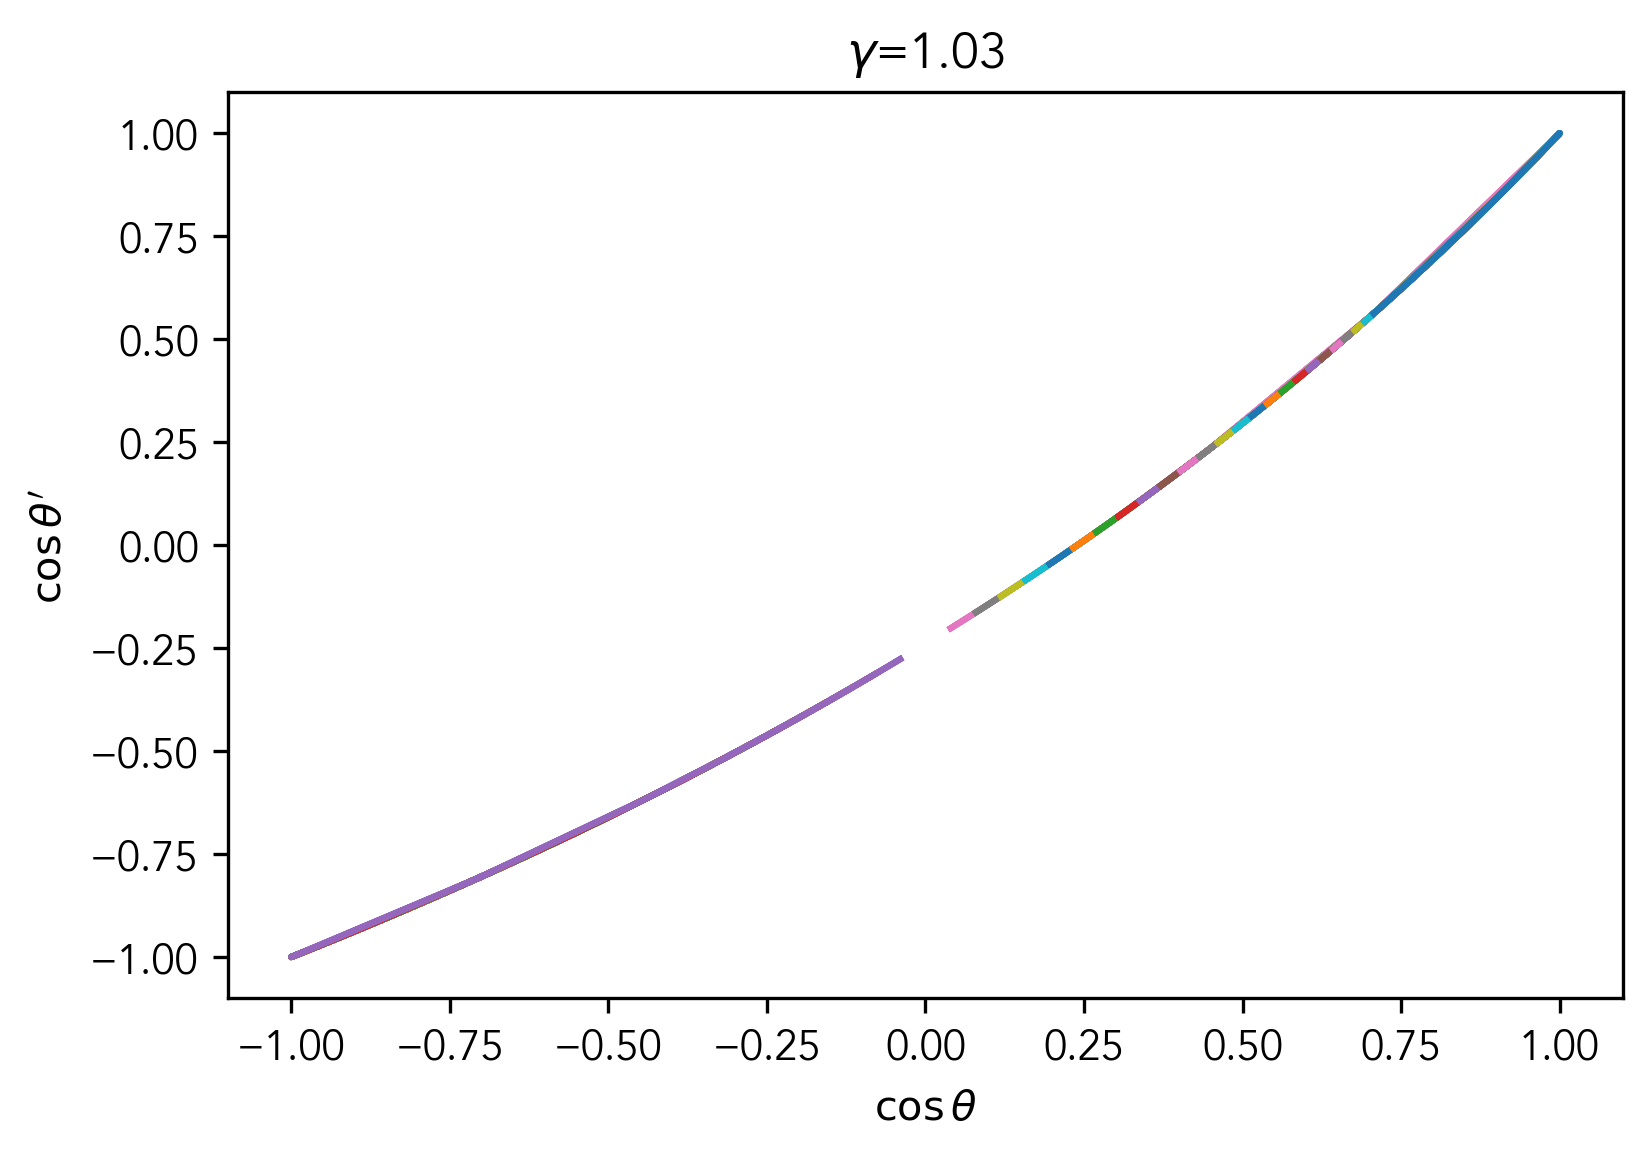

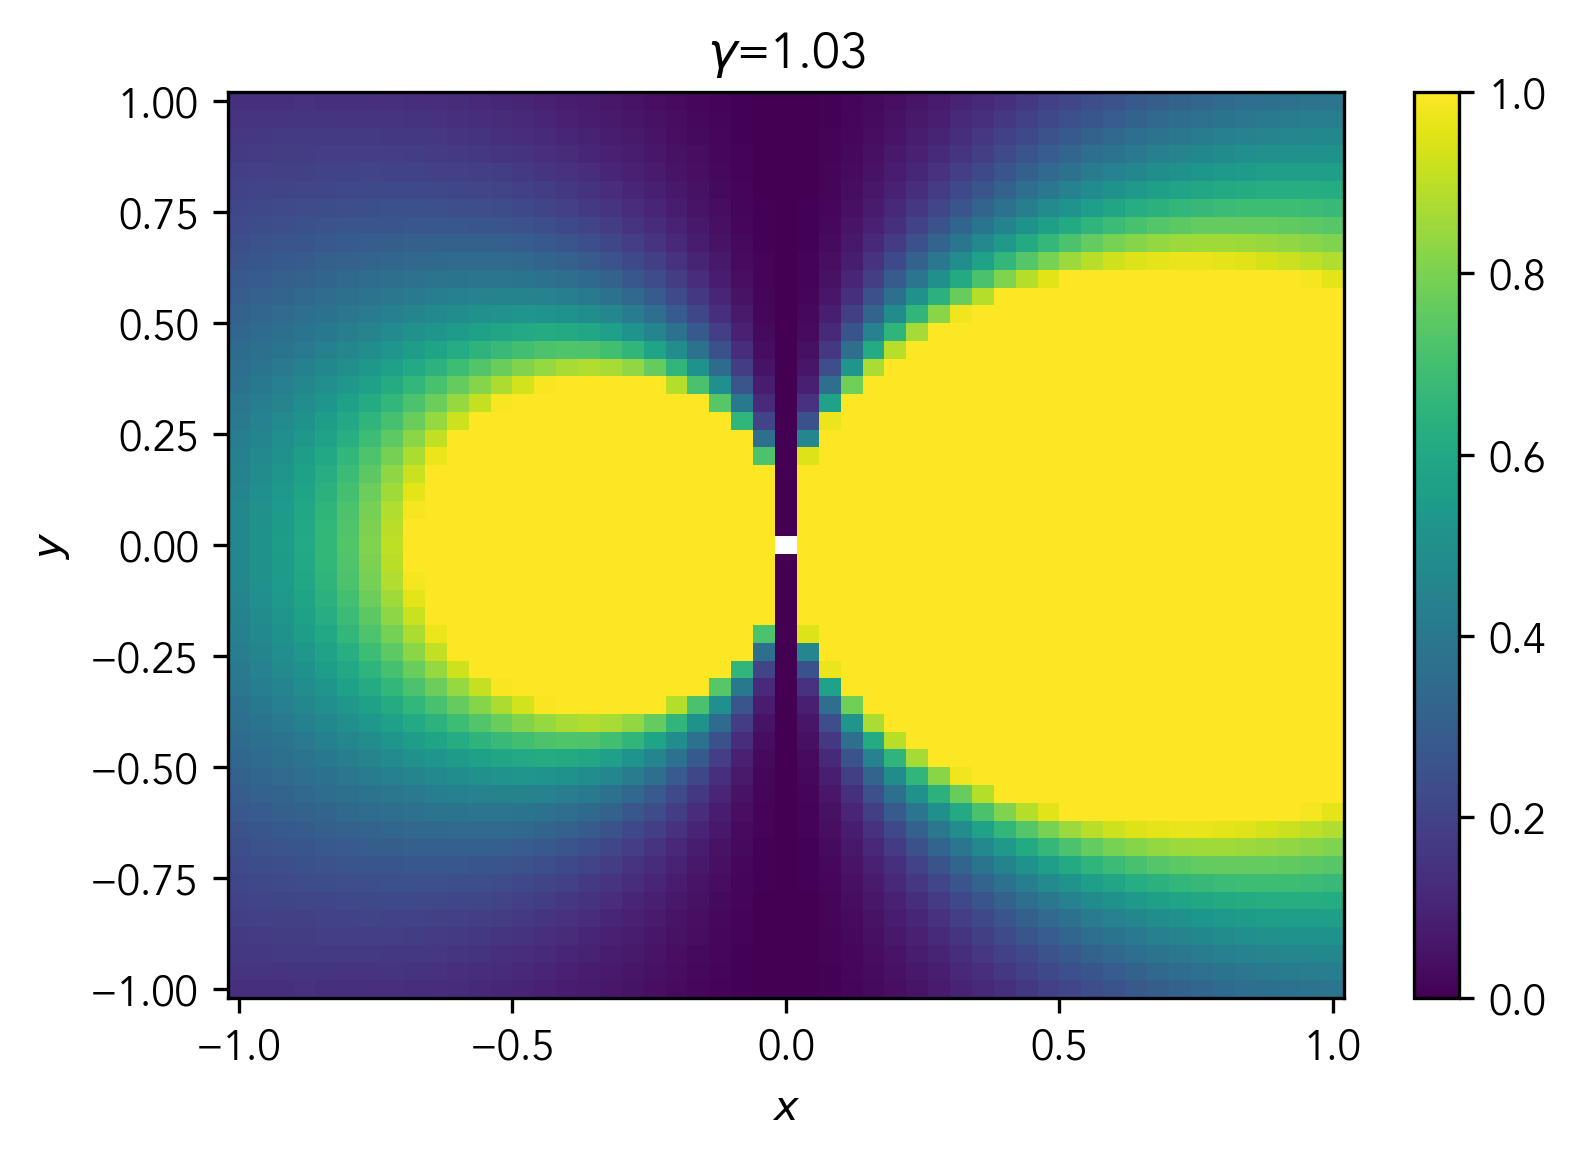

In [2]:
import math
def relativisticCosTheta(theta,gamma):
    beta=np.sqrt((gamma**2 -1)/(gamma**2))
    cosT=(np.cos(theta)-beta)/(1-beta*np.cos(theta))
    return cosT


# Generate data for the plot
# Do all at z=0 for now
z=0
x = np.linspace(-1, 1, 51)
y = np.linspace(-1, 1, 51)
gamma=1.03
beta=np.sqrt((gamma**2 -1)/(gamma**2))
xprime = gamma * (x - beta)
yprime = y
X,Y = np.meshgrid(x,y)
X2,Y2 = np.meshgrid(xprime,yprime)
r = np.sqrt(X**2 + Y**2 + z**2)
sinTheta = Y / r
cosTheta =  X /r
cosThetaPrime=relativisticCosTheta(np.arccos(cosTheta),gamma)
    

fig, ax = plt.subplots()
ax.plot(cosTheta,cosThetaPrime)
ax.set_xlabel(r"$\cos\theta$");
ax.set_ylabel(r"$\cos\theta^\prime$");
ax.set_title("$\gamma$="+str(gamma))


# Generate the plot
fig, ax = plt.subplots()
##cmap=ax.pcolormesh(x, y, cosTheta**2/r**2,vmin=-1,vmax=1)
#cmap=ax.pcolormesh(x, y, (1-cosThetaPrime**2)/r**2,vmin=0,vmax=1)
cmap=ax.pcolormesh(x, y, cosTheta**2//r**2,vmin=0,vmax=1)
cmap=ax.pcolormesh(x, y, (1/gamma**4)*1./(1-beta*cosTheta)**3*cosTheta**2/r**2,vmin=0,vmax=1)
fig.colorbar(cmap)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("$\gamma$="+str(gamma))
plt.show()





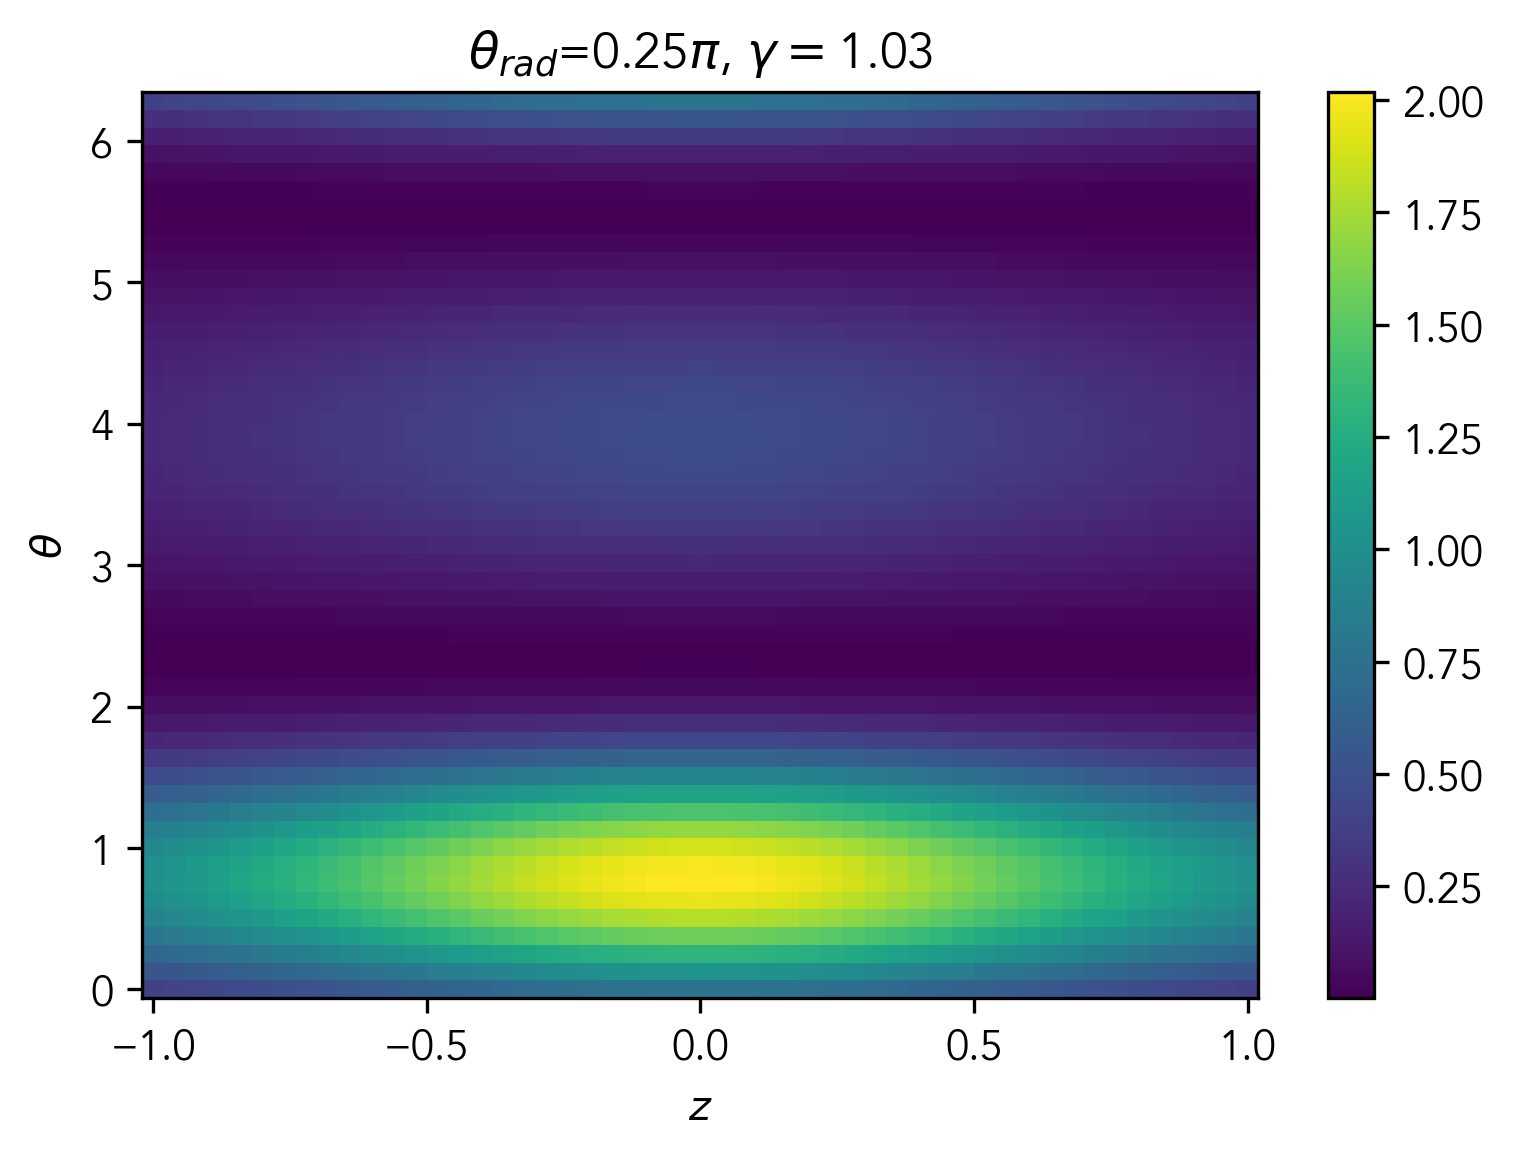

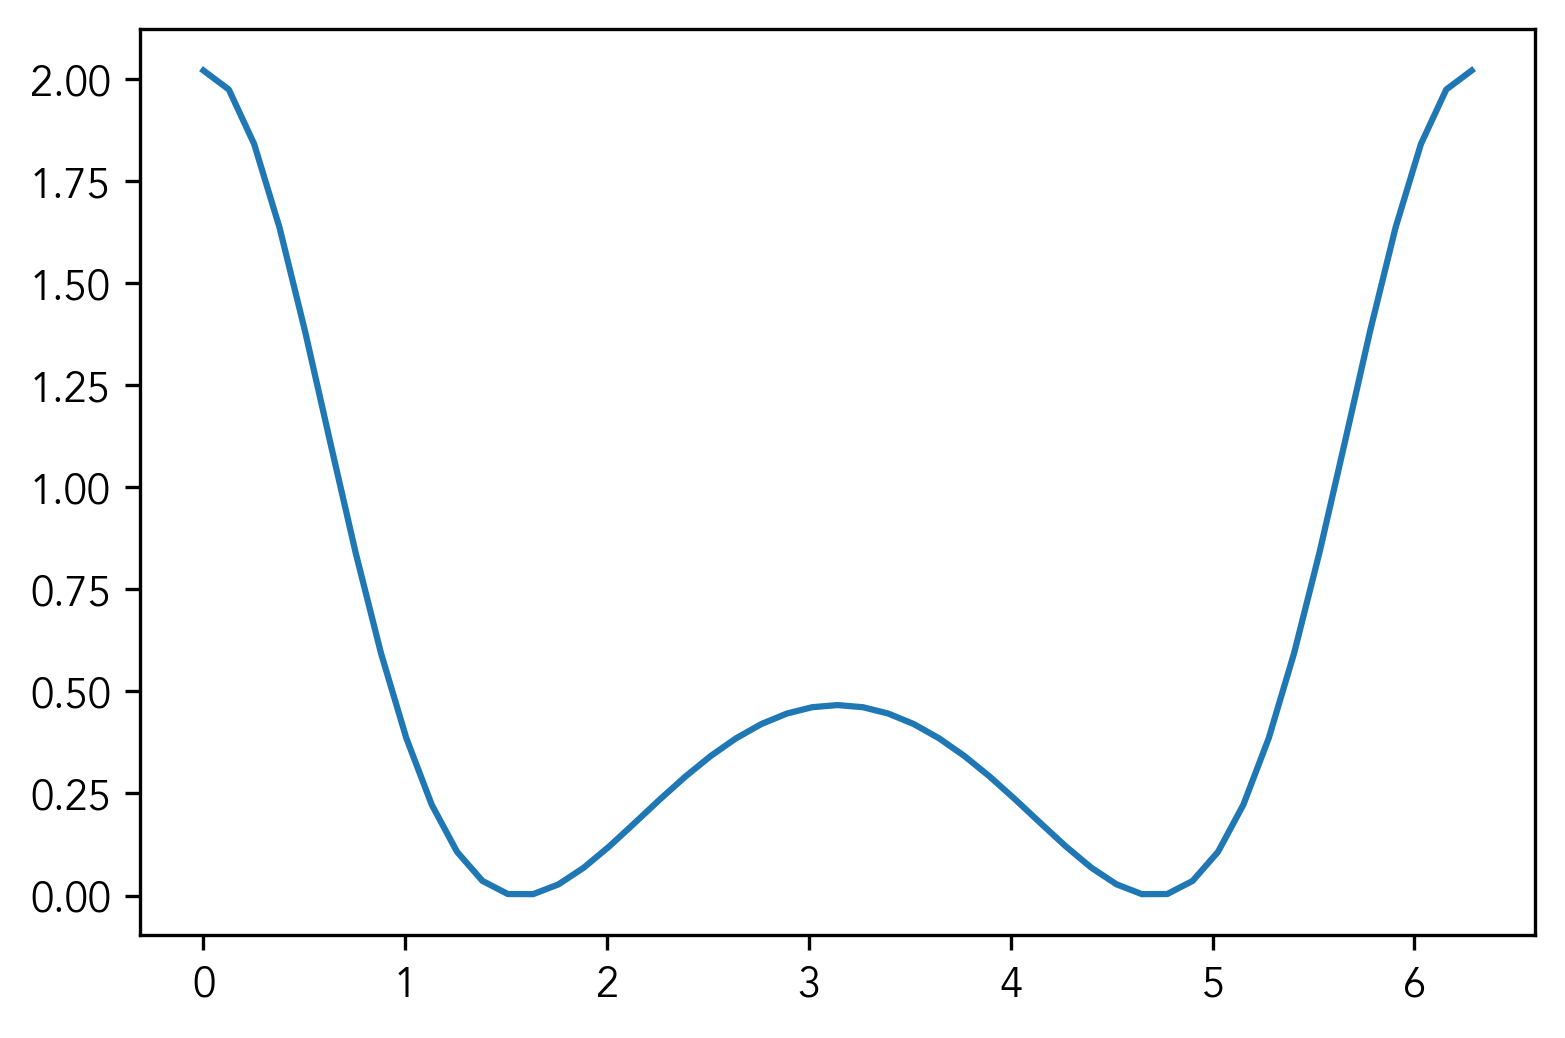

In [3]:
import math

gamma=1.03
def getRadiation(theta,r,gamma):
    beta=np.sqrt((gamma**2 -1)/(gamma**2))
    cosTheta=np.cos(theta)
    return (1/gamma**4)*1./(1-beta*cosTheta)**3*cosTheta**2/r**2
    

angle=math.pi/4
#angle=0
rcyl=1
z = np.linspace(-1, 1, 51)
theta = np.linspace(0, 2*math.pi, 51)
Z,Theta = np.meshgrid(z,theta)
rsphere=np.sqrt(rcyl**2 + Z**2)

fig, ax = plt.subplots()
cmap=ax.pcolormesh(z, theta, getRadiation(Theta-angle,rsphere,gamma))
ax.set_xlabel("$z$")
ax.set_ylabel(r"$\theta$")
ax.set_title(r"$\theta_{rad}$="+str(angle/math.pi)+"$\pi$, $\gamma=$"+str(gamma))
fig.colorbar(cmap)
plt.show()



fig, ax = plt.subplots()
ax.plot(theta,getRadiation(theta,1,gamma))


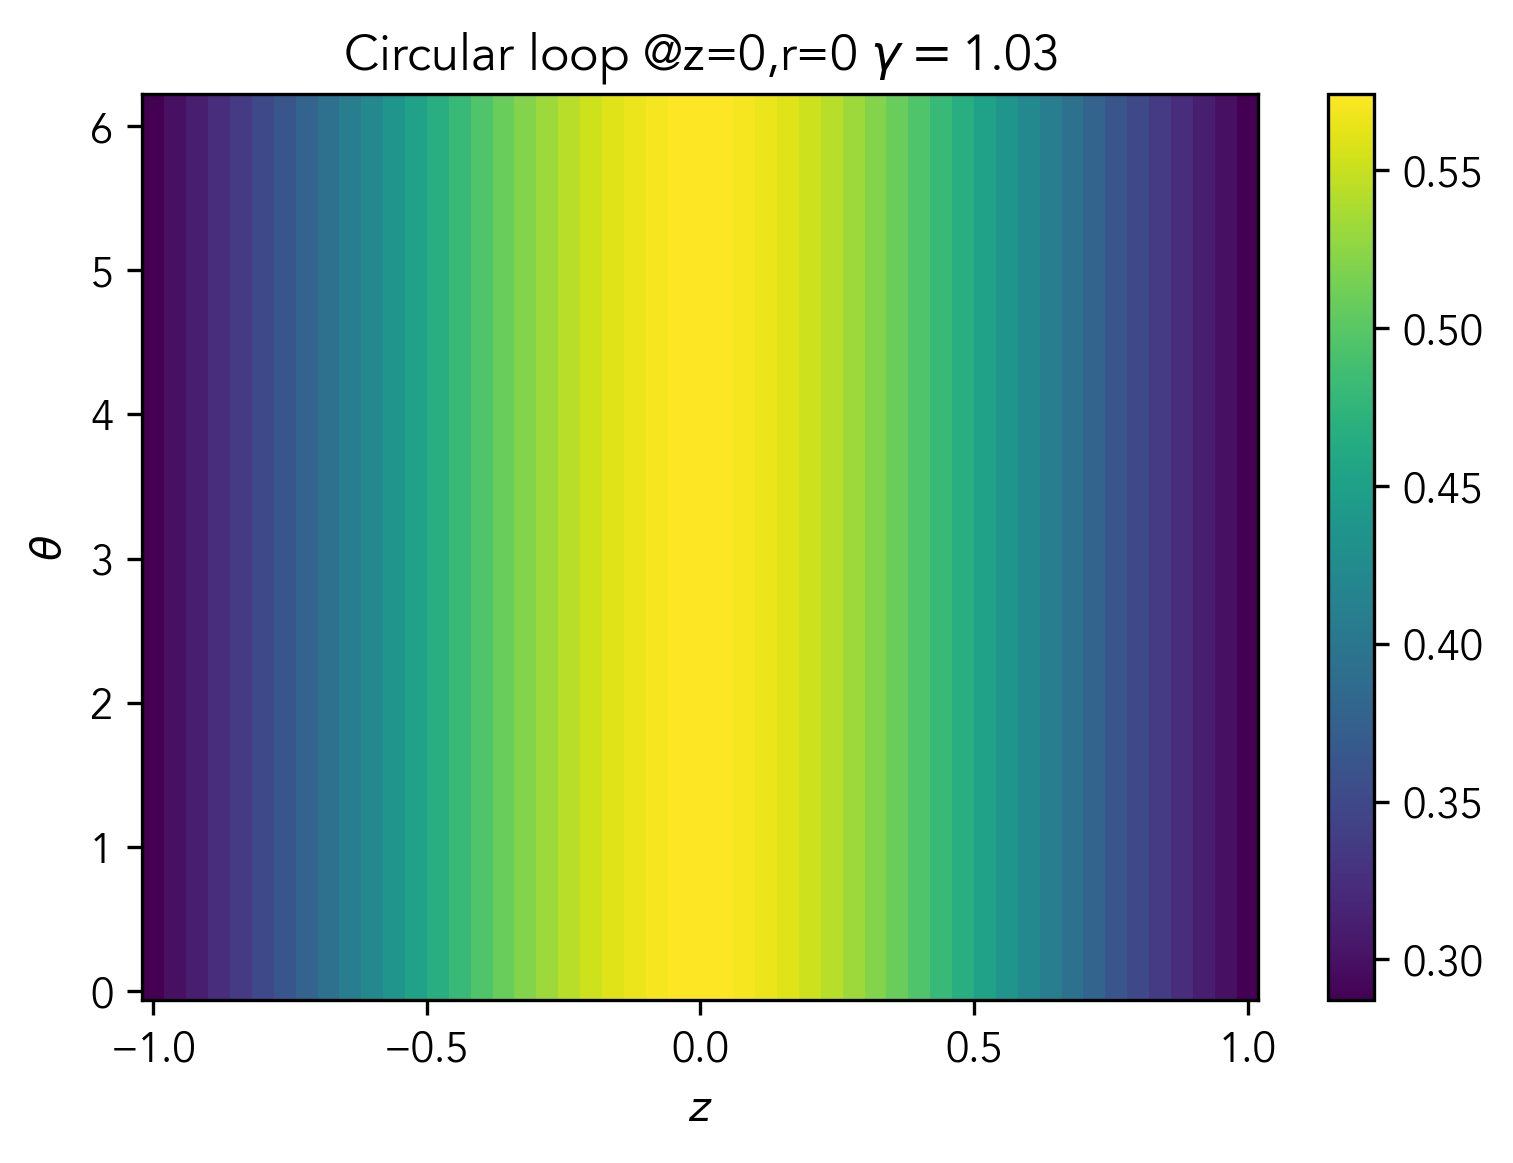

In [4]:
rcyl=1
z = np.linspace(-1, 1, 51)
theta = np.linspace(0, 2*math.pi, 51)
theta=theta[0:-1] #Remove duplicate point at 2pi
Z,Theta = np.meshgrid(z,theta)

sintheta = np.sin(Theta)
rsphere=np.sqrt(rcyl**2 + Z**2)
energy=np.zeros(Z.shape)

for angle in theta:
    newTheta=Theta-angle
    energy=energy+getRadiation(newTheta,rsphere,gamma)
energy/=len(theta)



fig, ax = plt.subplots()
cmap=ax.pcolormesh(z, theta, energy)
ax.set_xlabel("$z$")
ax.set_ylabel(r"$\theta$")
ax.set_title(r"Circular loop @z=0,r=0 $\gamma=$"+str(gamma))
fig.colorbar(cmap)
plt.show()

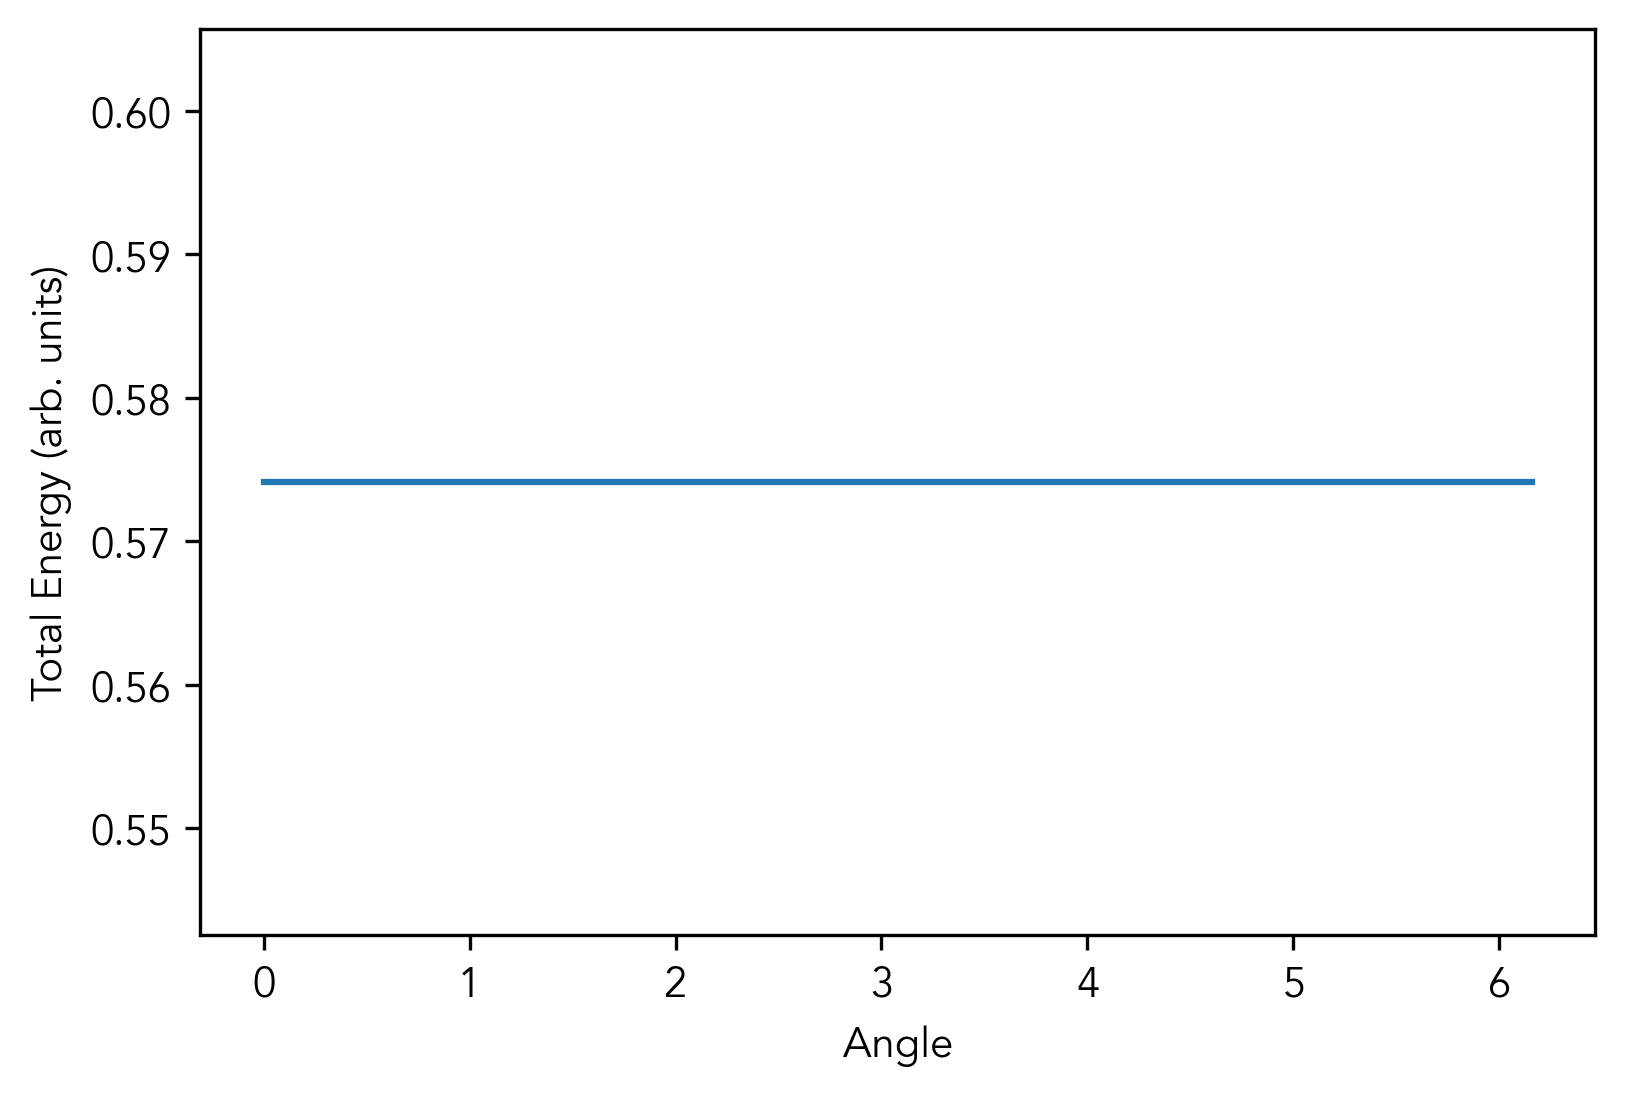

In [5]:
fig, ax = plt.subplots()
ax.plot(theta,np.amax(energy,axis=1))
ax.set_xlabel("Angle");
ax.set_ylabel("Total Energy (arb. units)");

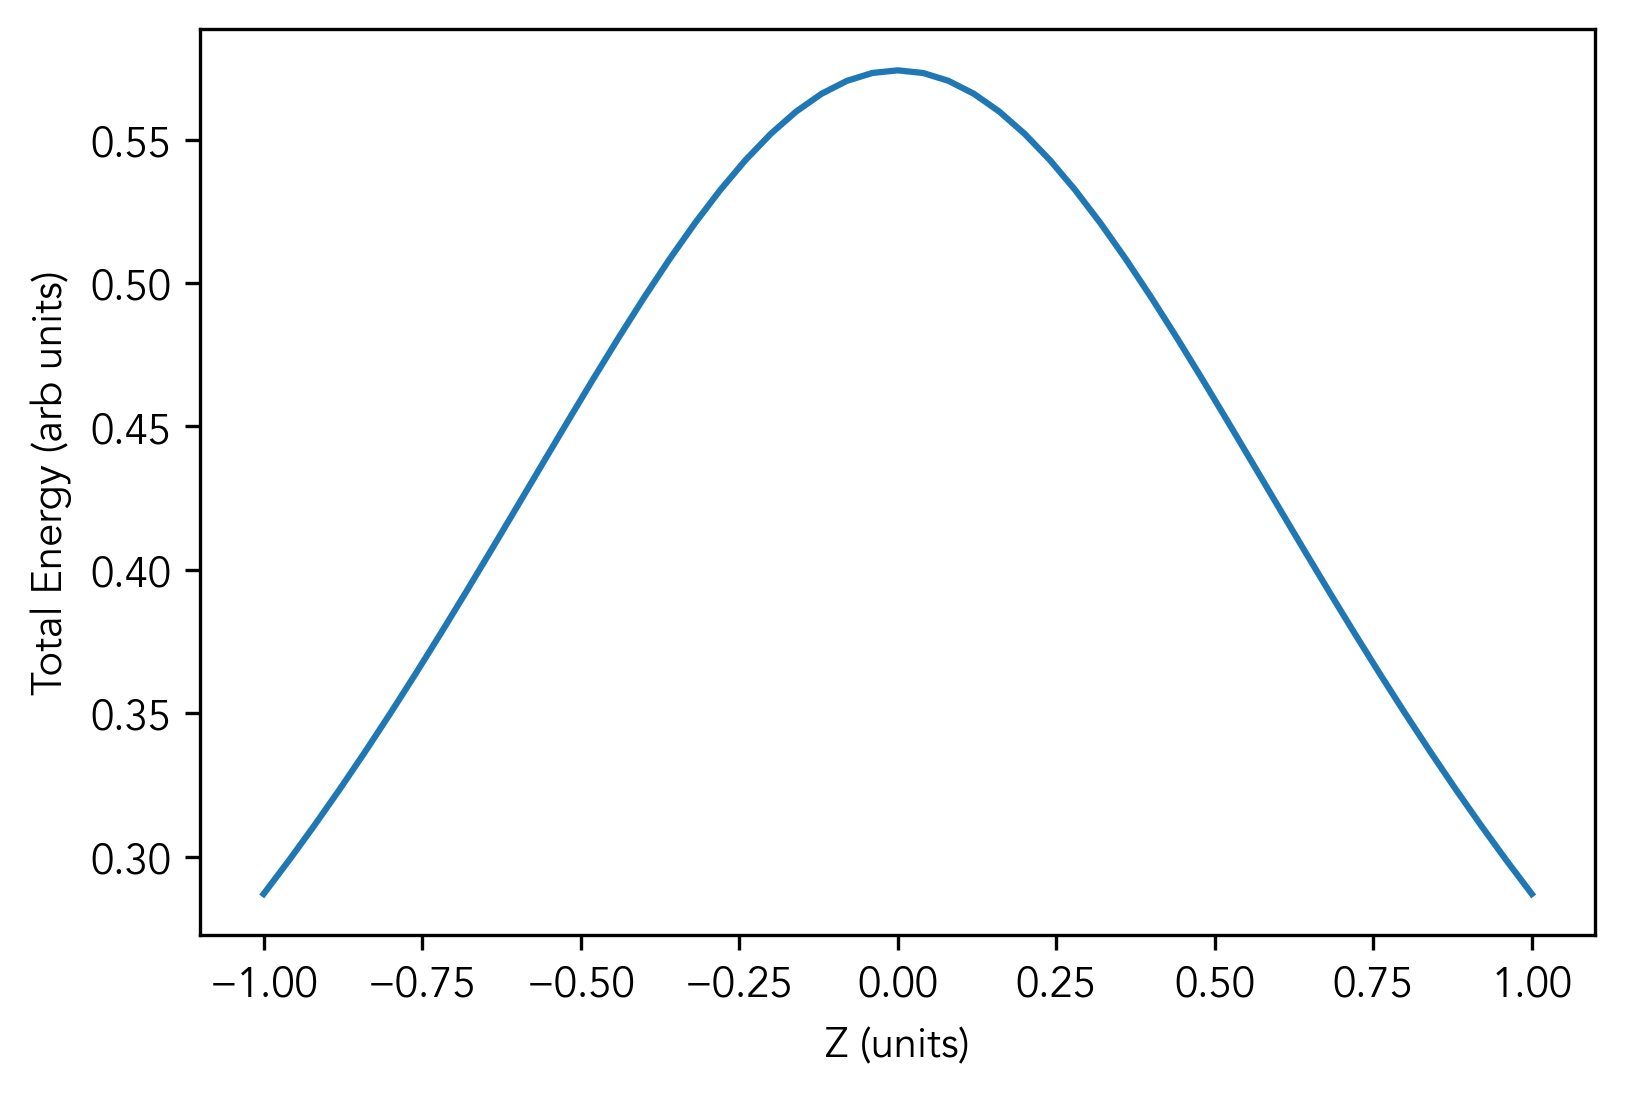

In [6]:
fig, ax = plt.subplots()
ax.plot(z,np.amax(energy,axis=0))
ax.set_xlabel("Z (units)");
ax.set_ylabel("Total Energy (arb units)");

Text(0, 0.5, 'Axial Position (m)')

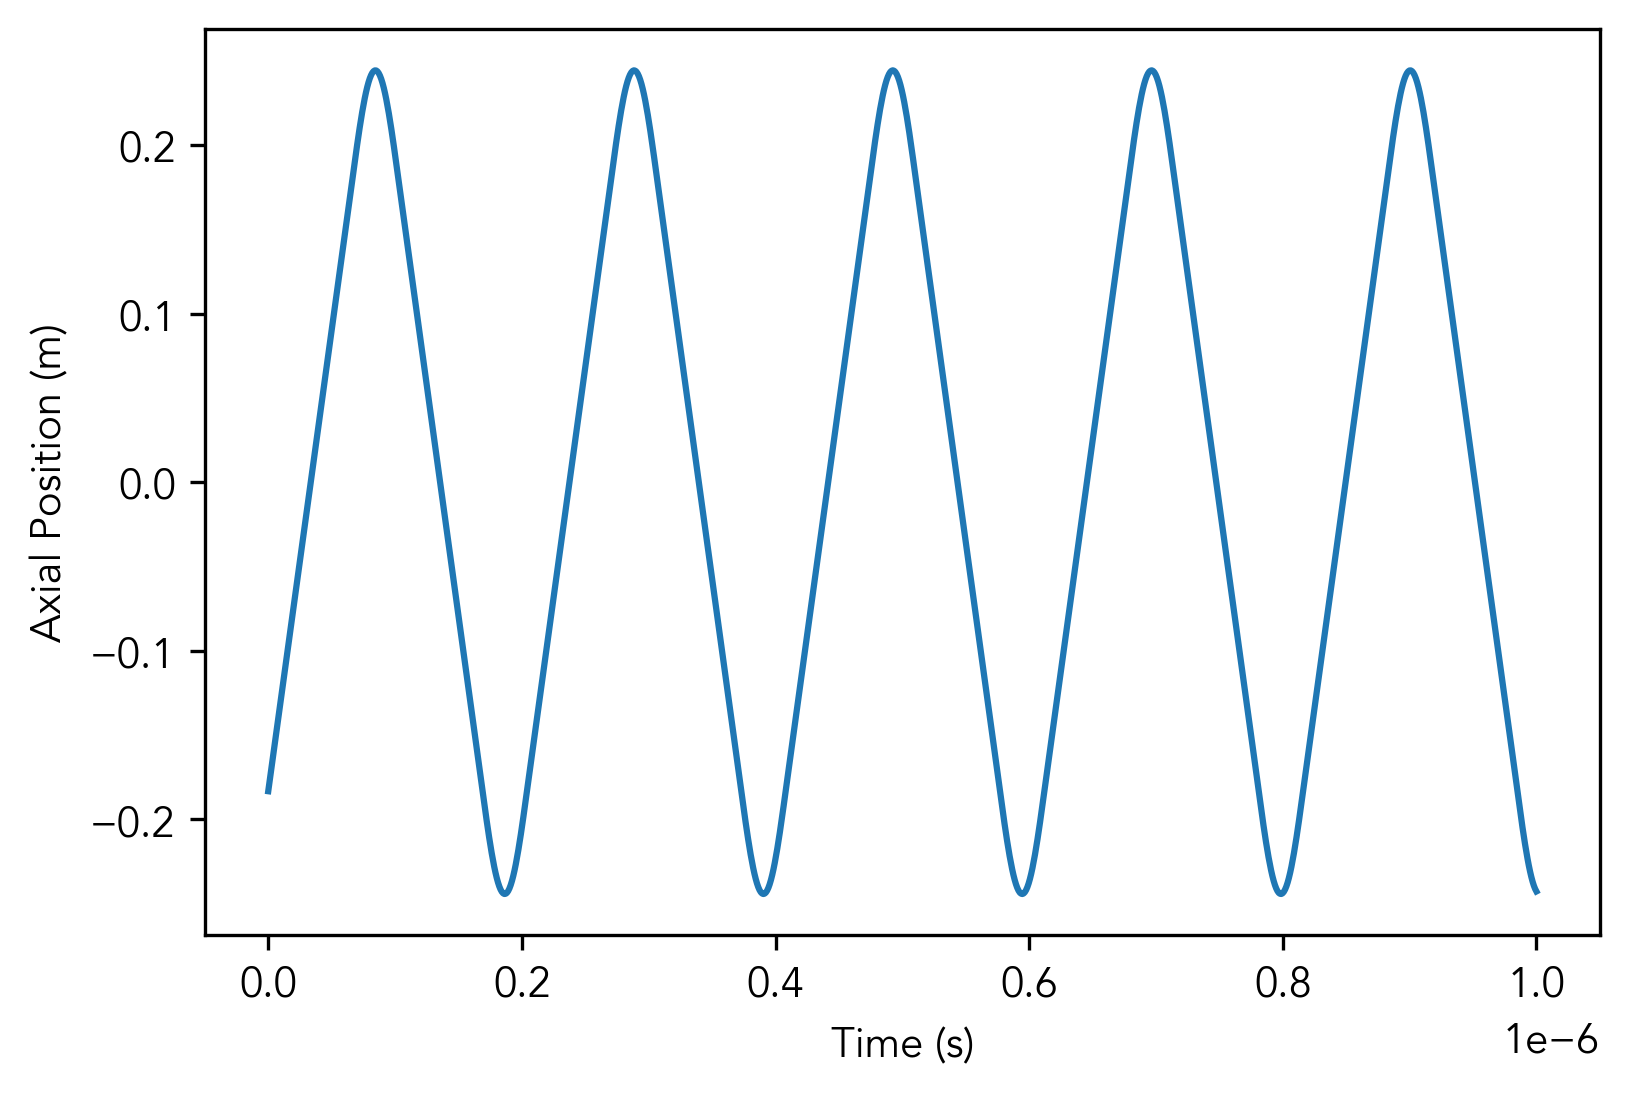

In [7]:
def zPosParam(tIn,t0,t1,t2,vz0):
    t=tIn-t0
    T=2*t2
    L1=vz0*t1
    wa=math.pi/(t2-t1)
    tWrap=np.fmod(t,T)
    zmax=vz0/wa
    conds = [tWrap < t1, (tWrap >= t1) & (tWrap <= t2), (tWrap > t2) & (tWrap<=t1+t2), tWrap>t1+t2]   #The four regions of time
    funcs = [lambda tWrap: vz0*tWrap-L1/2, 
            lambda tWrap: zmax*np.sin(wa*(tWrap-t1))+L1/2, 
            lambda tWrap: -vz0*(tWrap-t2)+L1/2, 
            lambda tWrap: -zmax*np.sin(wa*(tWrap-t1-t2))-L1/2 ]  #the lambda keyword is allowing us to define a quick function
    return np.piecewise(tWrap, conds, funcs)  #Now do the piecewise calculation and return it
             
             
tIn=np.linspace(0,1e-6,1000)
fig, ax = plt.subplots()
ax.plot(tIn,zPosParam(tIn,0,6.7e-8,1.02e-7,5.47e6))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Axial Position (m)")


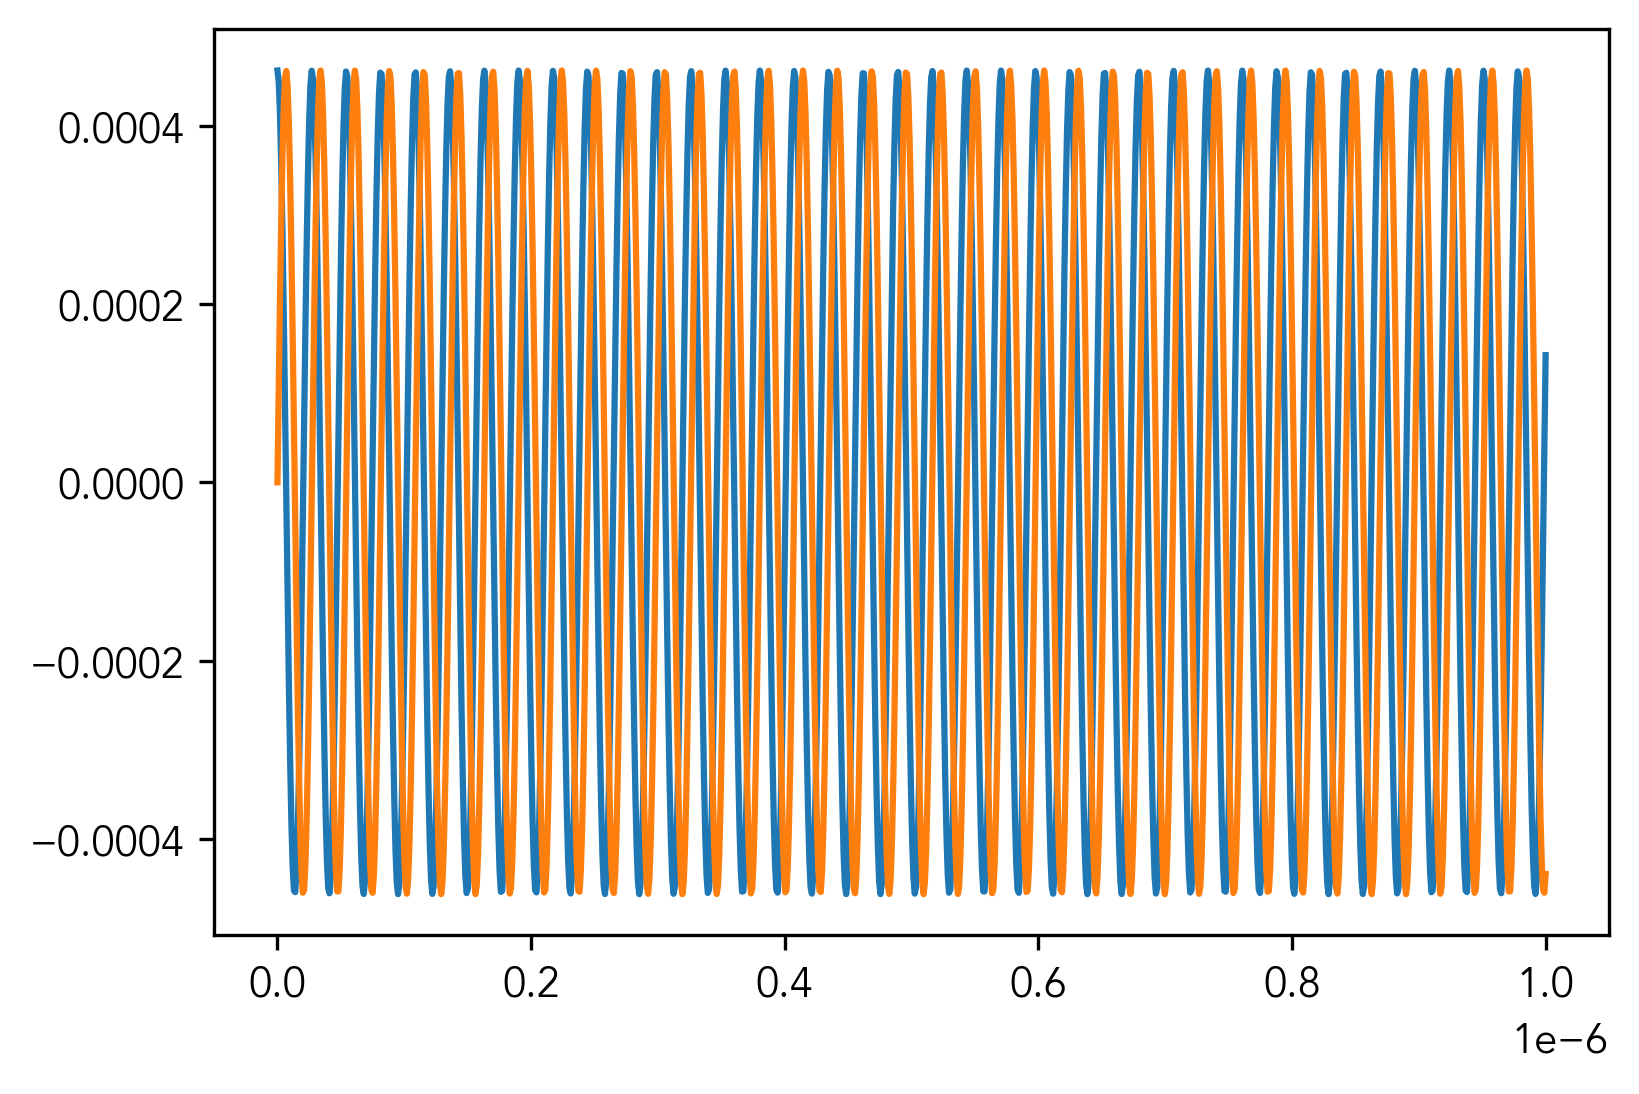

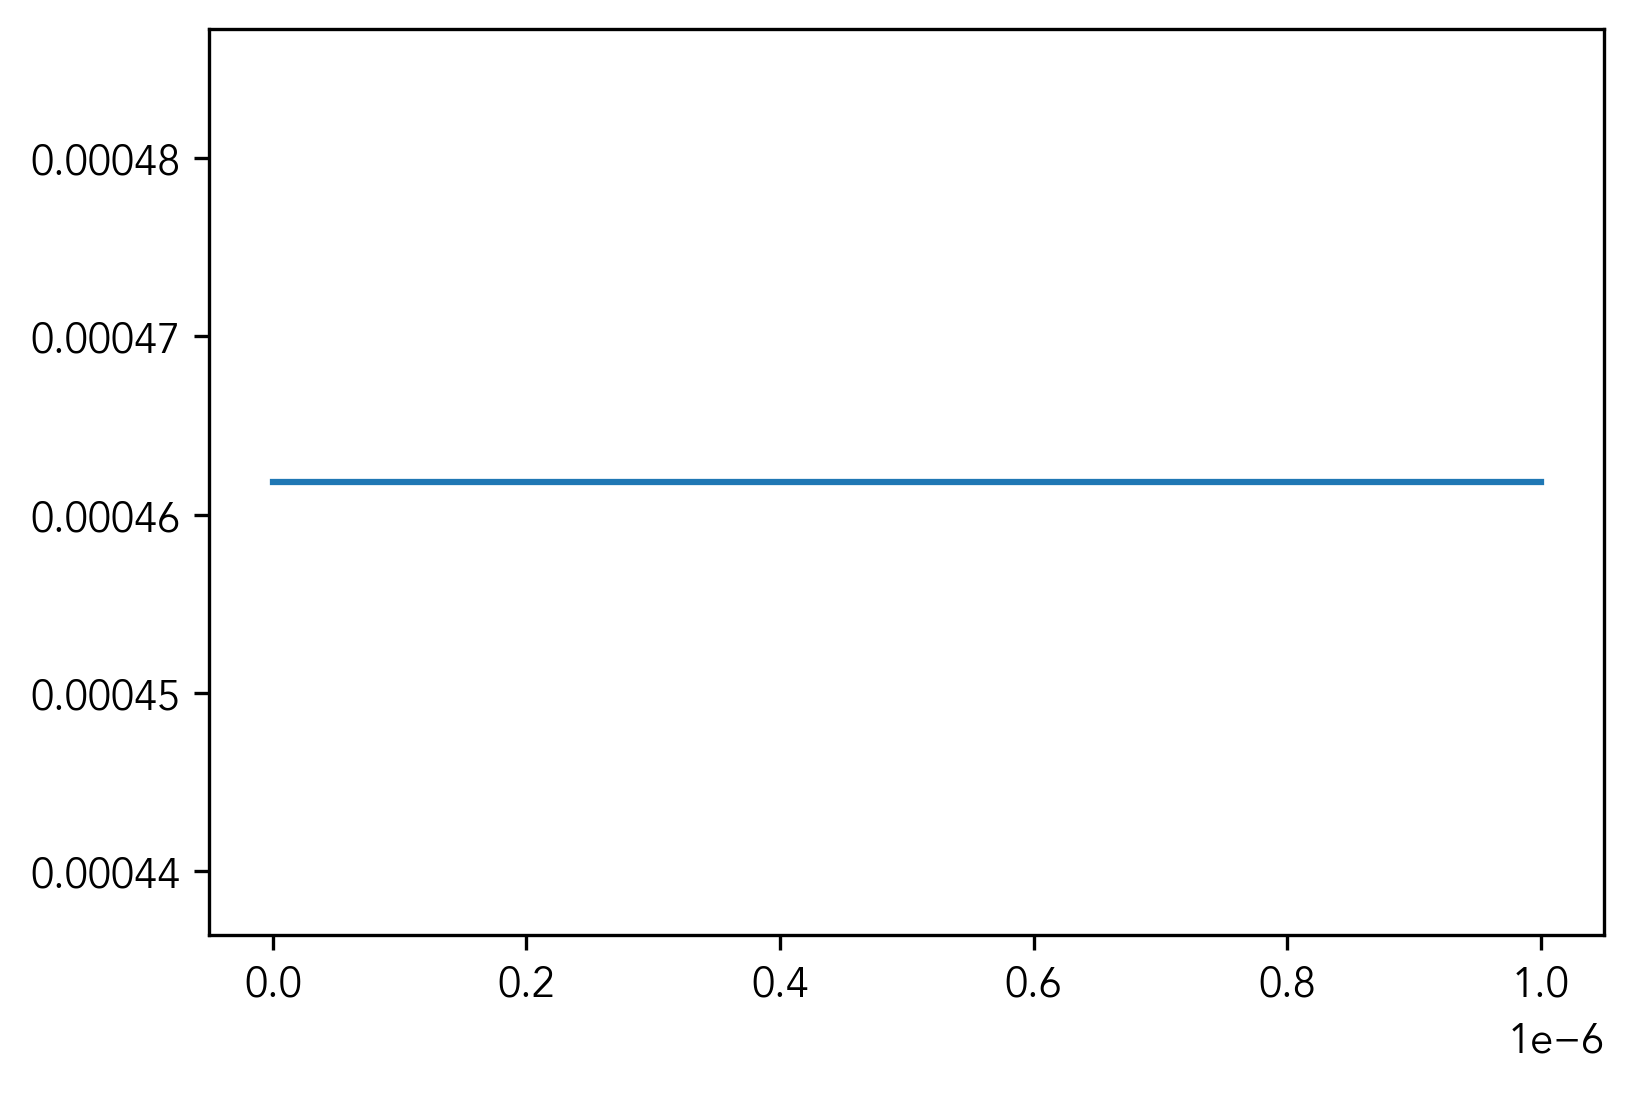

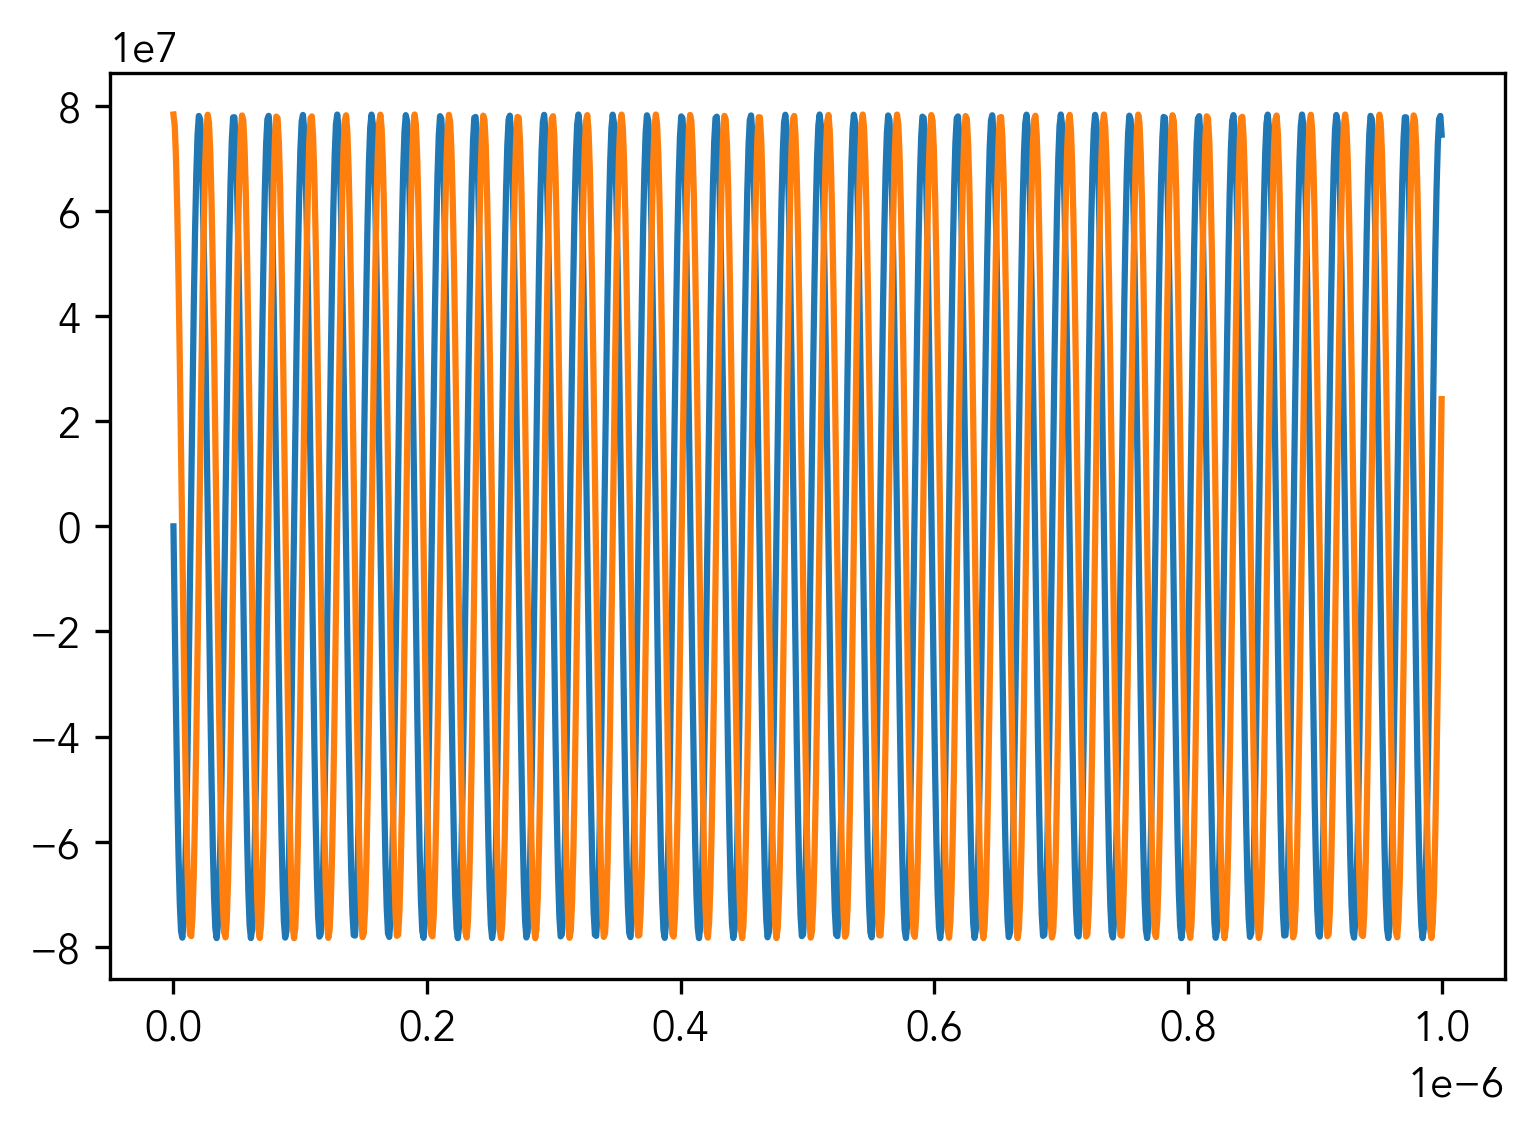

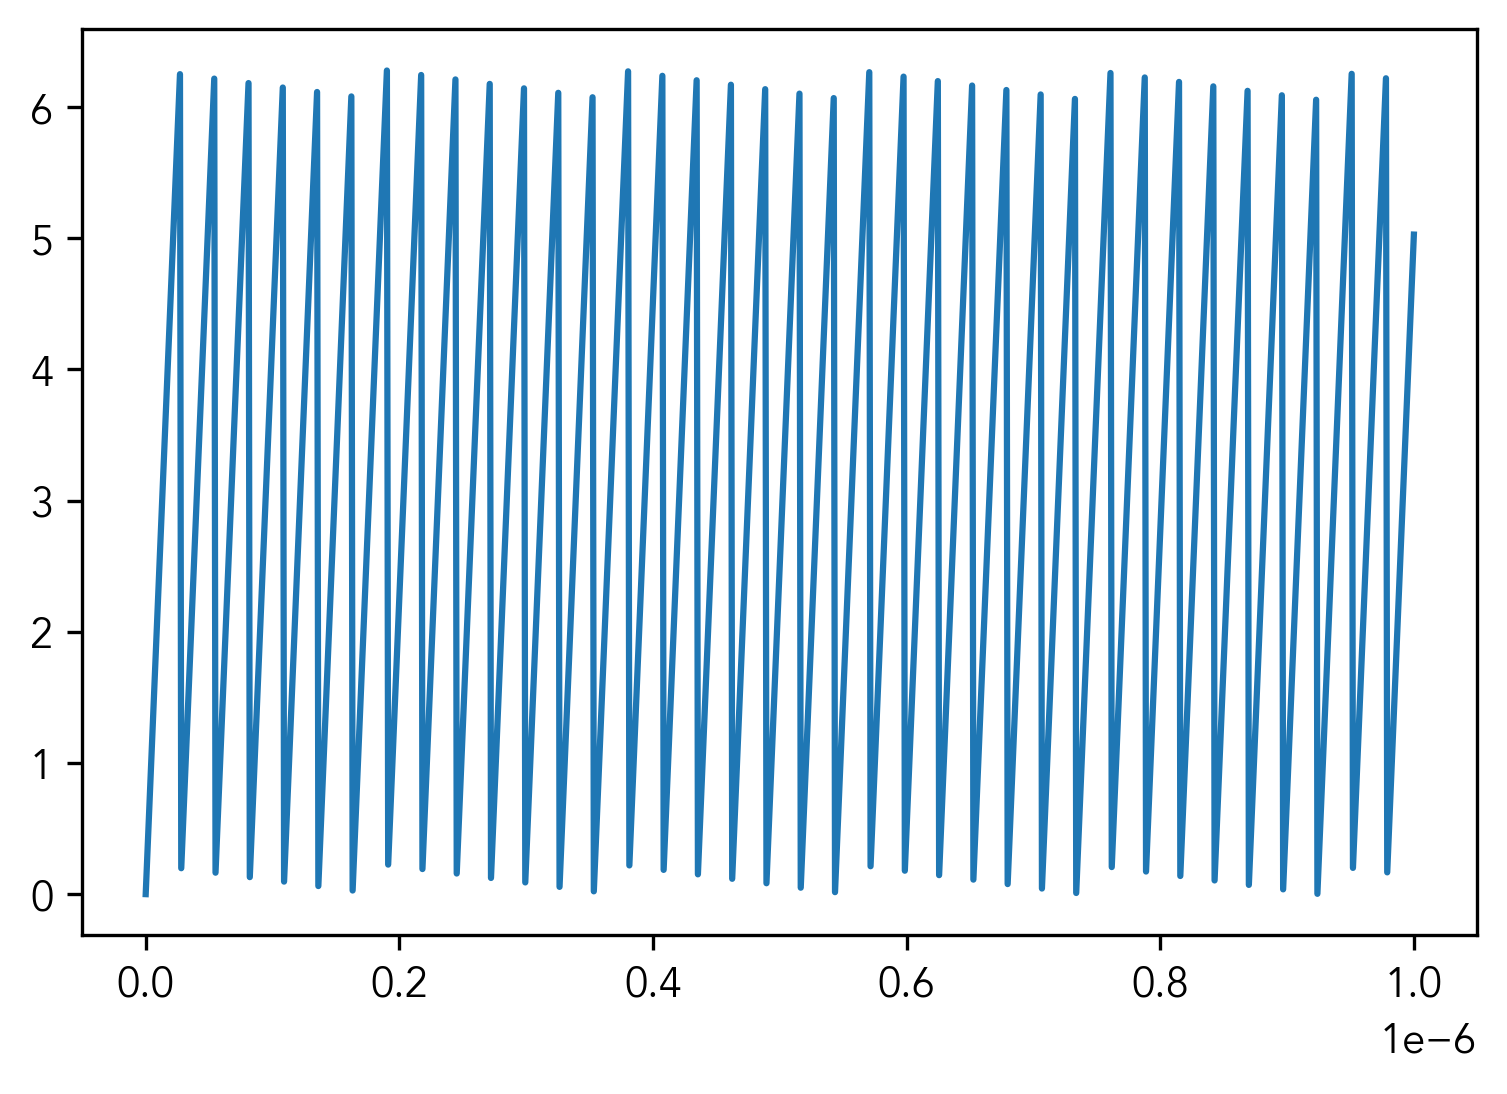

In [8]:
def xPosParam(tIn,x0,A,phi,f):
    return x0 + A*np.cos(2*math.pi*f*(tIn-phi))

def yPosParam(tIn,y0,A,phi,f):
    return y0 + A*np.sin(2*math.pi*f*(tIn-phi))

def rPosParam(tIn,x0,y0,A,phi,f):
    xPos=xPosParam(tIn,x0,A,phi,f)
    yPos=yPosParam(tIn,y0,A,phi,f)
    return np.sqrt(xPos**2 + yPos**2)

def getXVelocity(tIn,A,phi,f):
    return -2*math.pi*f*A*np.sin(2*math.pi*f*(tIn-phi))

def getYVelocity(tIn,A,phi,f):
    return 2*math.pi*f*A*np.cos(2*math.pi*f*(tIn-phi))

def getCircularVelocity(tIn,A,phi,f):
    return 2*math.pi*f*A

def getVelocityAngle(tIn,A,phi,f):
    return np.fmod(2*math.pi*f*(tIn-phi),2*math.pi)

fig, ax = plt.subplots()
ax.plot(tIn,xPosParam(tIn,0,4.61819e-4,0,2.70098e+10))
ax.plot(tIn,yPosParam(tIn,0,4.61819e-4,0,2.70098e+10))


fig, ax = plt.subplots()
ax.plot(tIn,rPosParam(tIn,0,0,4.61819e-4,0,2.70098e+10))


fig, ax = plt.subplots()
ax.plot(tIn,getXVelocity(tIn,4.61819e-4,0,2.70098e+10))
ax.plot(tIn,getYVelocity(tIn,4.61819e-4,0,2.70098e+10))
#ax.plot(tIn,np.sqrt(getXVelocity(tIn,4.61819e-4,0,2.70098e+10)*getXVelocity(tIn,4.61819e-4,0,2.70098e+10) + getYVelocity(tIn,4.61819e-4,0,2.70098e+10)*getYVelocity(tIn,4.61819e-4,0,2.70098e+10)))


fig, ax = plt.subplots()
ax.plot(tIn,getVelocityAngle(tIn,4.61819e-4,0,2.70098e+10))

(50, 51, 1000)
(50, 51)
(50, 51)


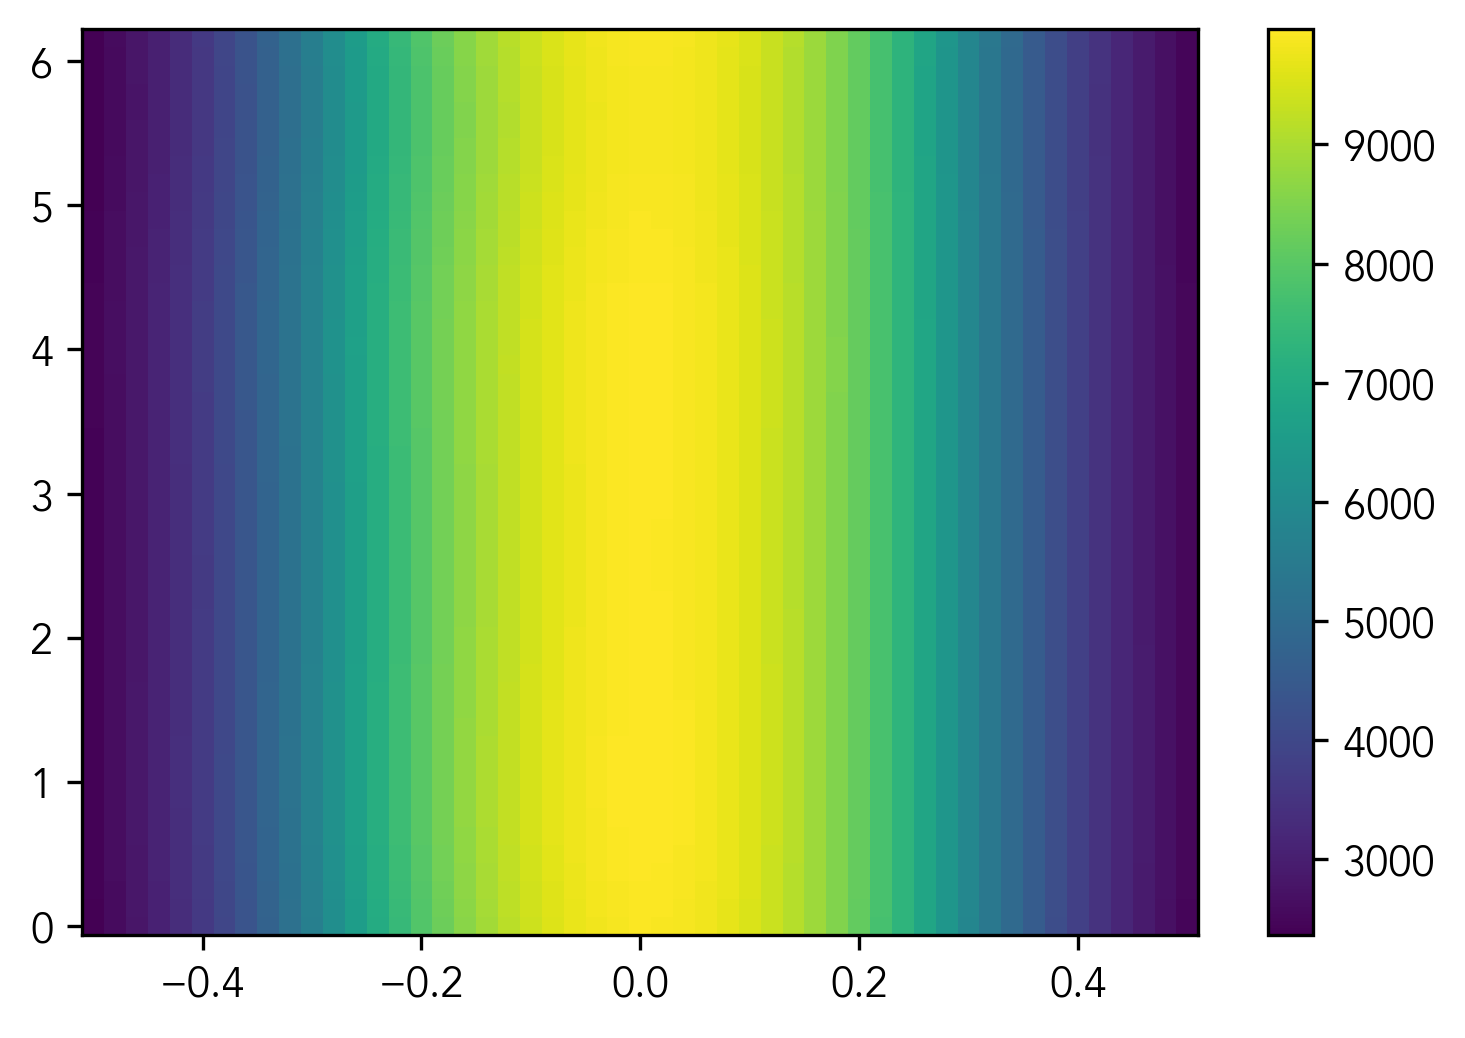

In [9]:
#So here we are going to set up the coordinates of an unrolled cylinder
rcyl=0.2  #Radius of a cylinder (might be in metres but need to go back and check some of the units)
zMax=0.5
z = np.linspace(-zMax, zMax, 51)  # Cylinder runs from -1 to 1
theta = np.linspace(0, 2*math.pi, 51) # Angle round the cylinder
theta=theta[0:-1] #Remove duplicate point at 2pi
Z,Theta = np.meshgrid(z,theta)   #Create a 2D grid of Z vs theta for making colour plots
rsphere=np.sqrt(rcyl**2 + Z**2)  #Mapping the cylindrical coordinates to spherical ones

x0=y0=0 #Starting radial coordinates
A=4.61819e-4 #Amplitude of helix 
phase=0 #Phase
f=2.70098e+10 #Cyclotron frequency

tIn=np.linspace(0,1e-6,1000)

xcyl=rcyl*np.cos(Theta)
ycyl=rcyl*np.sin(Theta)
xcyl=np.repeat(xcyl[:, :, np.newaxis], len(tIn), axis=2)
ycyl=np.repeat(ycyl[:, :, np.newaxis], len(tIn), axis=2)
newZ=np.repeat(Z[:, :, np.newaxis], len(tIn), axis=2)
newTheta=np.repeat(Theta[:, :, np.newaxis], len(tIn), axis=2)

xVals=xPosParam(tIn,x0,A,phase,f)
yVals=yPosParam(tIn,y0,A,phase,f)
zVals=zPosParam(tIn,0,6.7e-8,1.02e-7,5.47e6)
vangle=np.arctan2(yVals,xVals)

dx=xcyl-xVals
dy=ycyl-yVals
dz=newZ-zVals

print(np.shape(dx))

newNewTheta=np.fmod(newTheta-vangle,math.pi*2)
rSphere=np.sqrt(dx*dx +dy*dy +dz*dz)
energy=getRadiation(newNewTheta,rSphere,gamma)

print(np.shape(newNewTheta[:,:,0]))


print(np.shape(np.sum(energy,axis=2)))
#for angle in theta:
#    newTheta=Theta-angle
#    energy=energy+getRadiation(newTheta,rsphere,gamma)
#energy/=len(theta)



fig, ax = plt.subplots()
#cmap=ax.pcolormesh(z, theta, newNewTheta[:,:,5])

cmap=ax.pcolormesh(z, theta,np.sum(energy,axis=2))
fig.colorbar(cmap)
plt.show()

/var/folders/tt/td83hb5118g0l77wvd_87jfr0000gn/T/ipykernel_70504/2973631917.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cmap=plt.pcolormesh(th, r, np.sum(energy,axis=2))


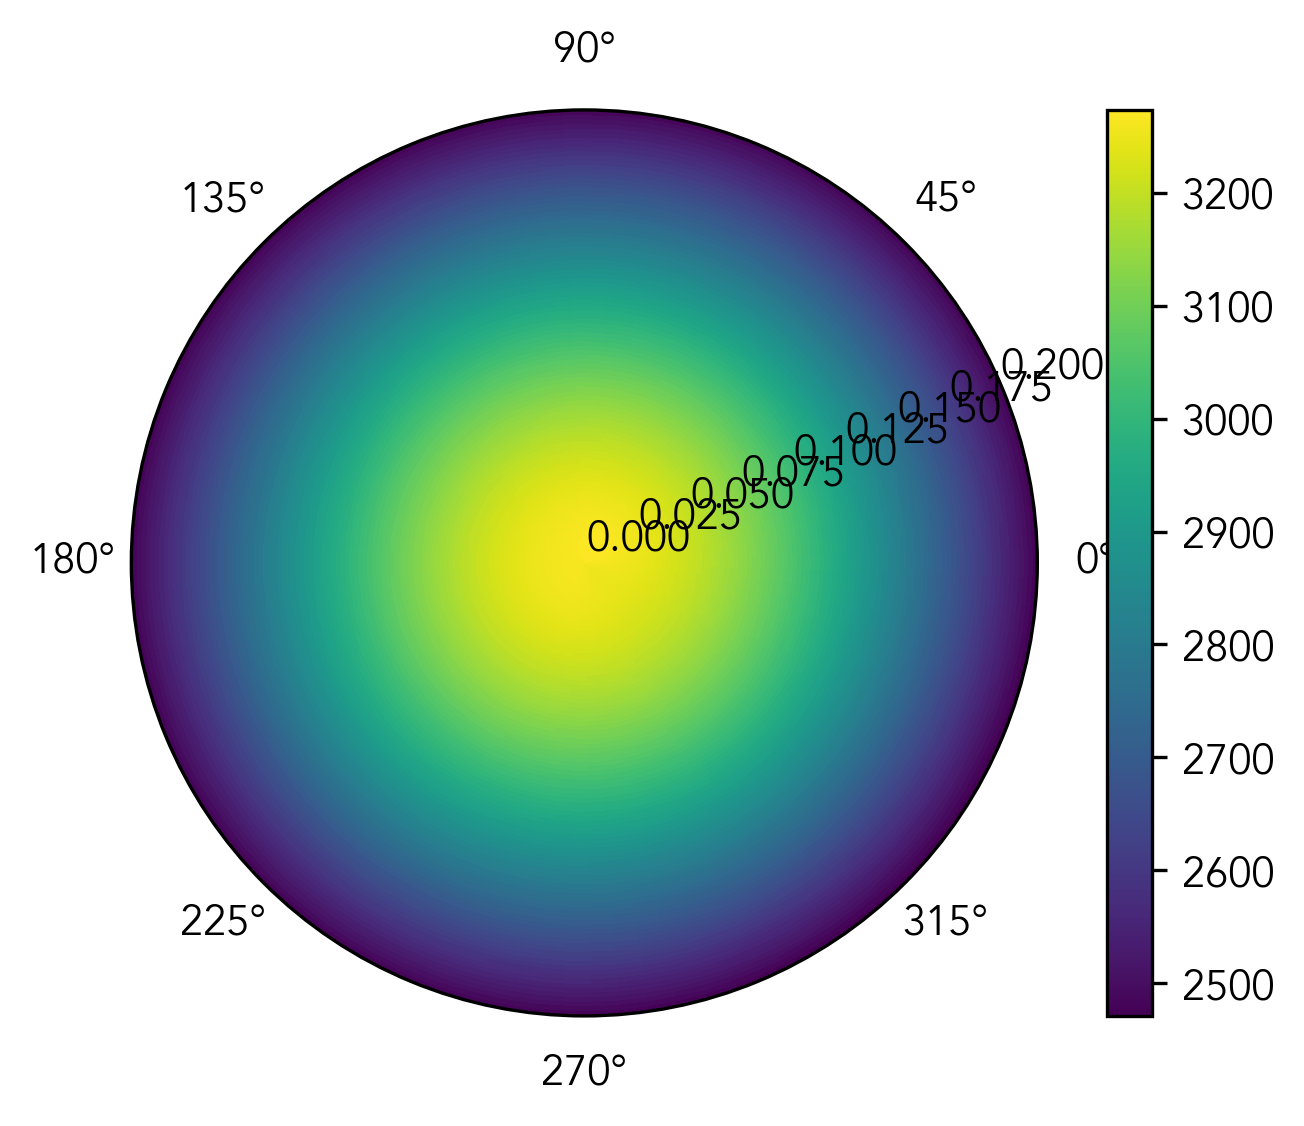

In [10]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()

rad = np.linspace(0, rcyl, 100)
azm = np.linspace(0, 2 * np.pi, 100)
r, th = np.meshgrid(rad, azm)

xcap=r*np.cos(th)
ycap=r*np.sin(th)
xcap=np.repeat(xcap[:, :, np.newaxis], len(tIn), axis=2)
ycap=np.repeat(ycap[:, :, np.newaxis], len(tIn), axis=2)
newTh=np.repeat(th[:, :, np.newaxis], len(tIn), axis=2)

dx=xcap-xVals
dy=ycap-yVals
dz=zMax-zVals

newNewTh=np.fmod(newTh-vangle,math.pi*2)
rSphere=np.sqrt(dx*dx +dy*dy +dz*dz)
energy=getRadiation(newNewTh,rSphere,gamma)


plt.subplot(projection="polar")

cmap=plt.pcolormesh(th, r, np.sum(energy,axis=2))
#plt.pcolormesh(th, z, r)

#plt.plot(azm, r, color='k', ls='none') 
#plt.grid()

fig.colorbar(cmap)
plt.show()

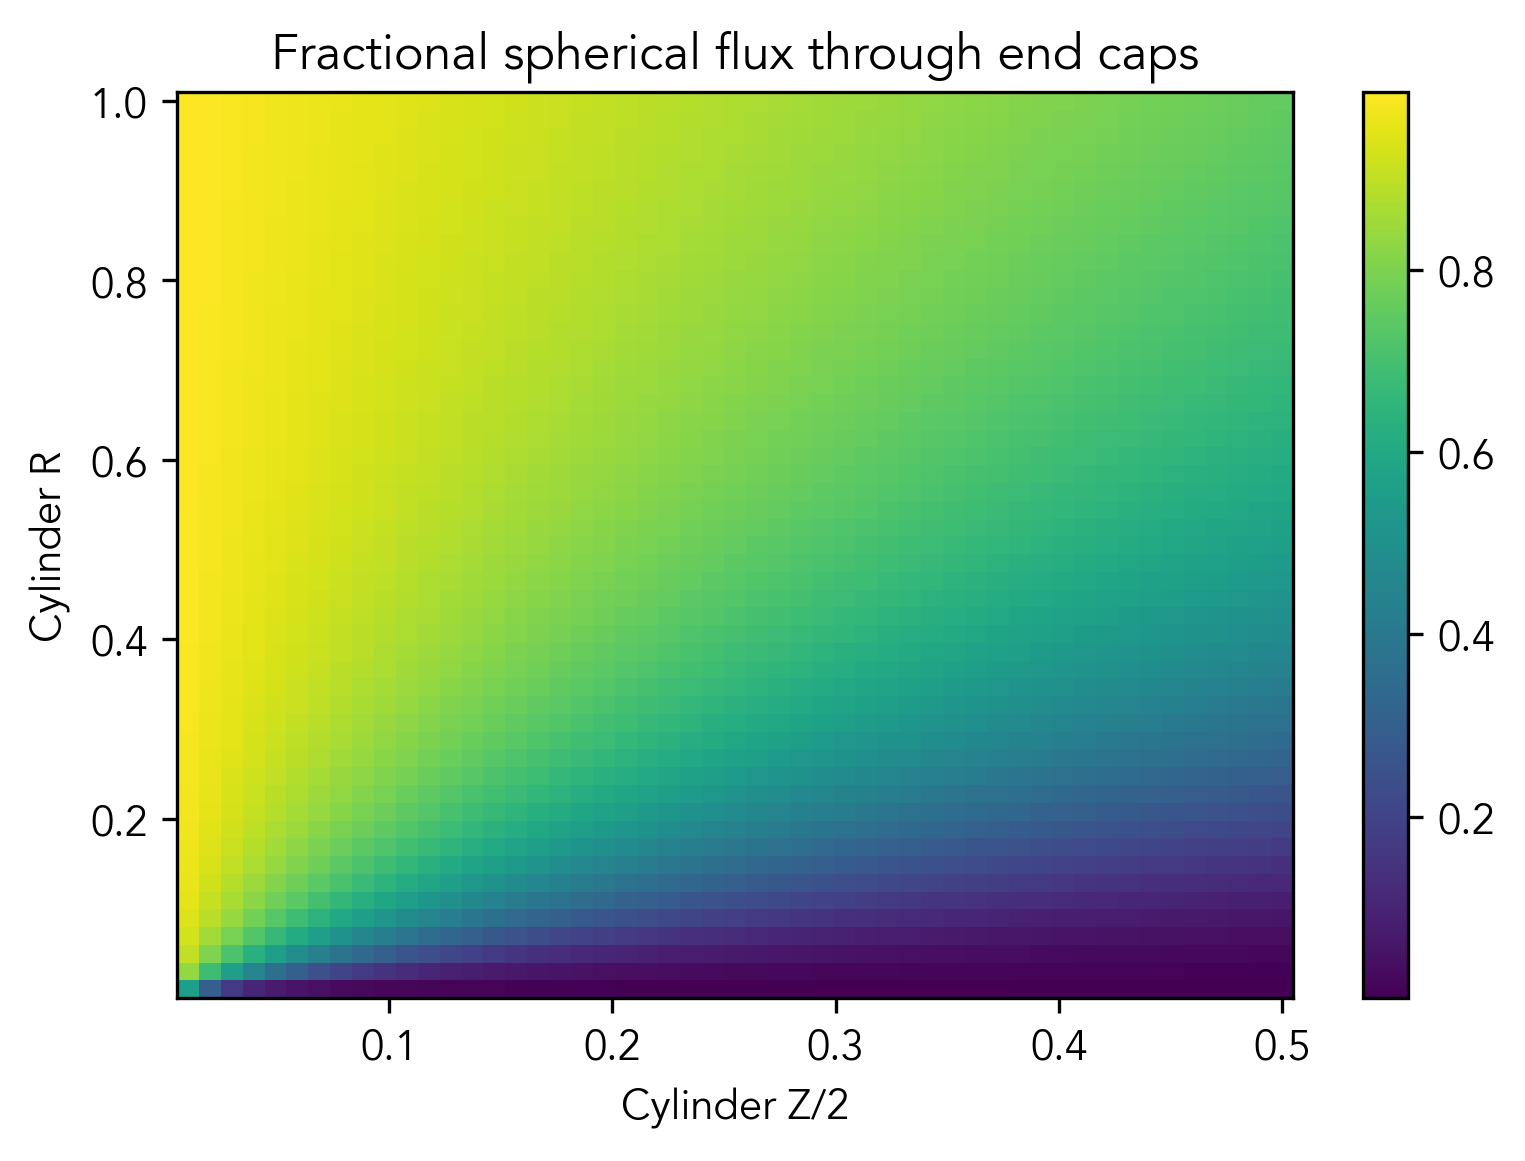

In [11]:
def endFrac(L,rc):
    return 0.5*L * (-1/np.sqrt(rc**2 +L**2/4) + 1/np.sqrt(L**2/4))

zMax=0.5
z = np.linspace(0.01, zMax, 51)  # Cylinder runs from -1 to 1
rcyl = np.linspace(0.01, 1,51) #Cylinder radius 
Z, R = np.meshgrid(z, rcyl)

fig, ax = plt.subplots()
#cmap=ax.pcolormesh(z, theta, newNewTheta[:,:,5])

cmap=ax.pcolormesh(Z, R,endFrac(Z,R))
fig.colorbar(cmap)
ax.set_xlabel("Cylinder Z/2")
ax.set_ylabel("Cylinder R")
ax.set_title("Fractional spherical flux through end caps")
plt.show()


In [12]:

T_end=18.574*1000*scipy.constants.e
def poyntingVectorRotatingDipole(T,B,theta,phi,r,t):
    me=scipy.constants.electron_mass
    v=np.sqrt(2*T/me)
    w=scipy.constants.e*B/me
    d=v/w
    A=1/(scipy.constants.c*scipy.constants.mu_0)
    B=((scipy.constants.mu_0*scipy.constants.e*d*w**2)/(4*math.pi*r))**2
    C=1 - np.sin(theta)**2*np.cos((w*(t-r/scipy.constants.c)-phi))**2
    return A*B*C
        

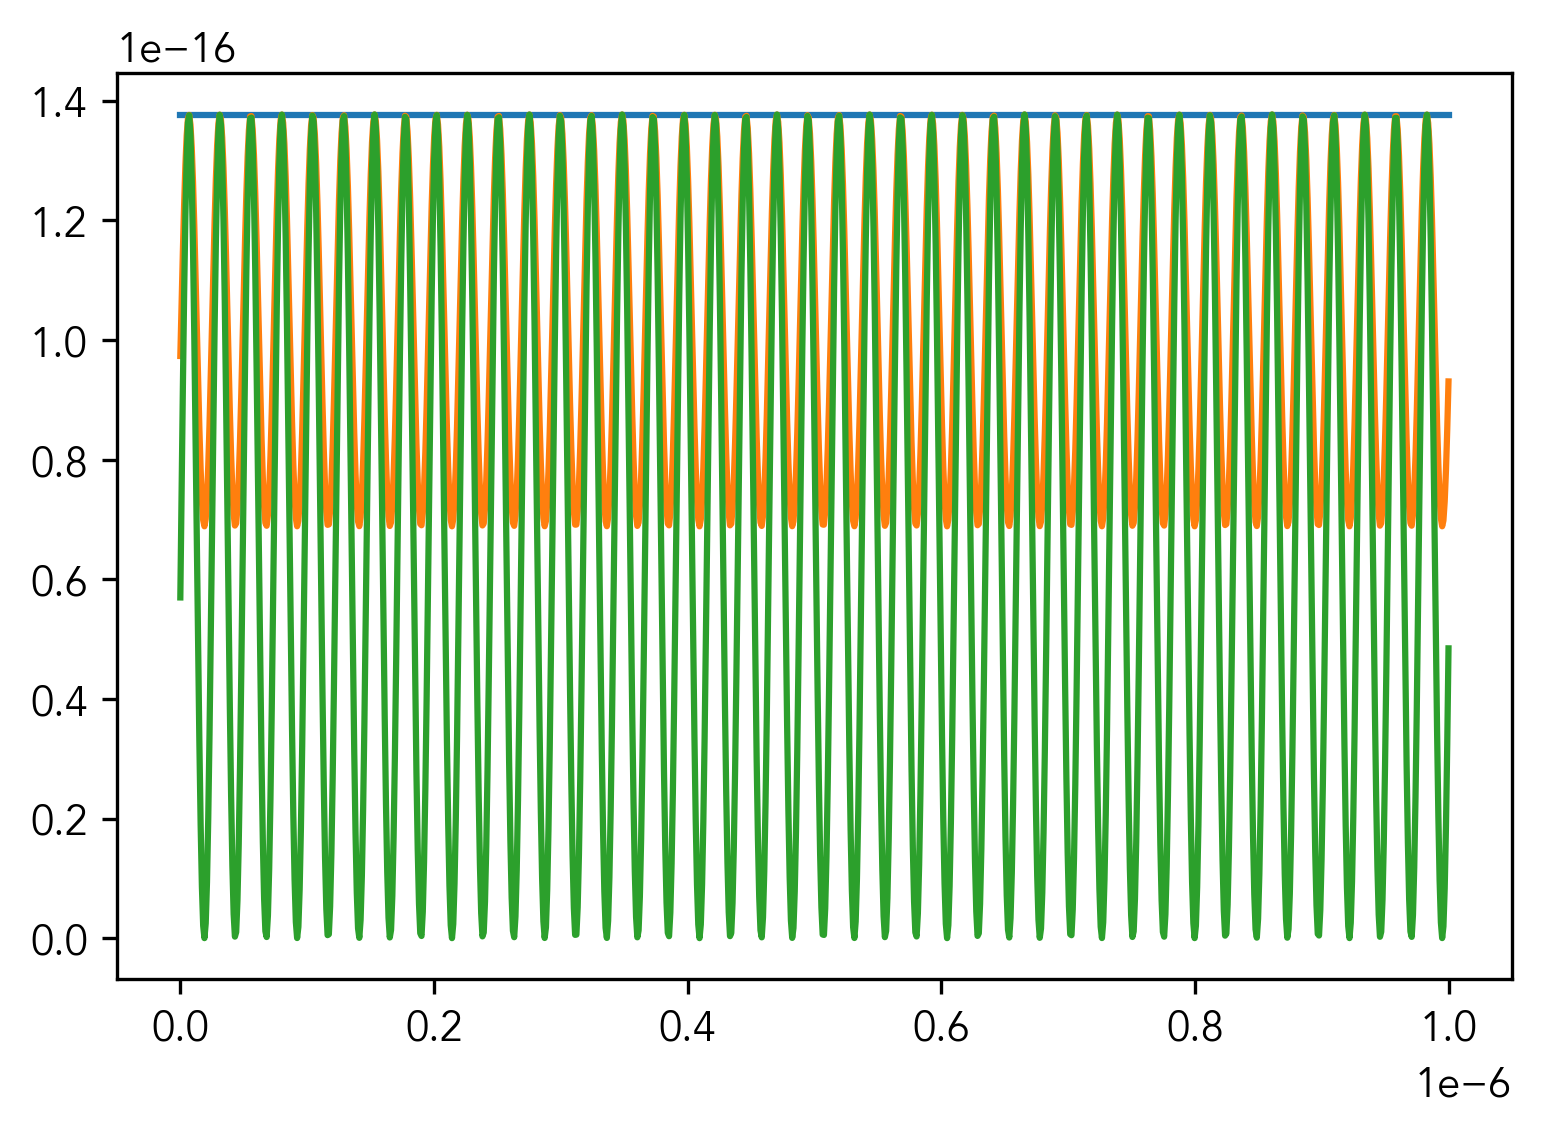

In [13]:

fig, ax = plt.subplots()
ax.plot(tIn,poyntingVectorRotatingDipole(T_end,1,0,0.1,1,tIn))
ax.plot(tIn,poyntingVectorRotatingDipole(T_end,1,math.pi/4,0.1,1,tIn))
ax.plot(tIn,poyntingVectorRotatingDipole(T_end,1,math.pi/2,0.1,1,tIn))
#ax.plot(tIn,poyntingVectordDipole(T_end,1,math.pi,0.1,1,tIn))

In [43]:
def electricFieldRotatingDipole(T,B,inZ,phi,rcyl,t):  
    #print(z)
    tempX=rcyl*np.cos(phi)
    tempY=rcyl*np.sin(phi)
    #print(inZ)
    tempTheta=np.arctan2(rcyl,inZ)
    #print(inZ)
    tempR=np.sqrt(tempX**2 + tempY**2 +inZ**2) 
    me=scipy.constants.electron_mass
    v=np.sqrt(2*T/me)
    w=scipy.constants.e*B/me
    d=v/w
    sintheta=np.sin(tempTheta)
    costheta=np.cos(tempTheta)
    sinphi=np.sin(phi)
    cosphi=np.cos(phi)
    A=-(scipy.constants.mu_0*scipy.constants.e*d*w**2)/(4*math.pi*tempR)
    B=(tempX/tempR)*np.cos(w*(t-tempR/scipy.constants.c))
    Bx=B*(sintheta*cosphi -1)
    By=B*sintheta*sinphi
    Bz=B*costheta
    C=(tempY/tempR)*np.sin(w*(t-tempR/scipy.constants.c))
    Cx=C*sintheta*cosphi
    Cy=C*(sintheta*sinphi-1)
    Cz=C*costheta
    #print(np.shape(A),np.shape(Bx),np.shape(Cx))
    return np.array([A*(Bx+Cx),A*(By+Cy),A*(Bz+Cz)])
    
    
    
    

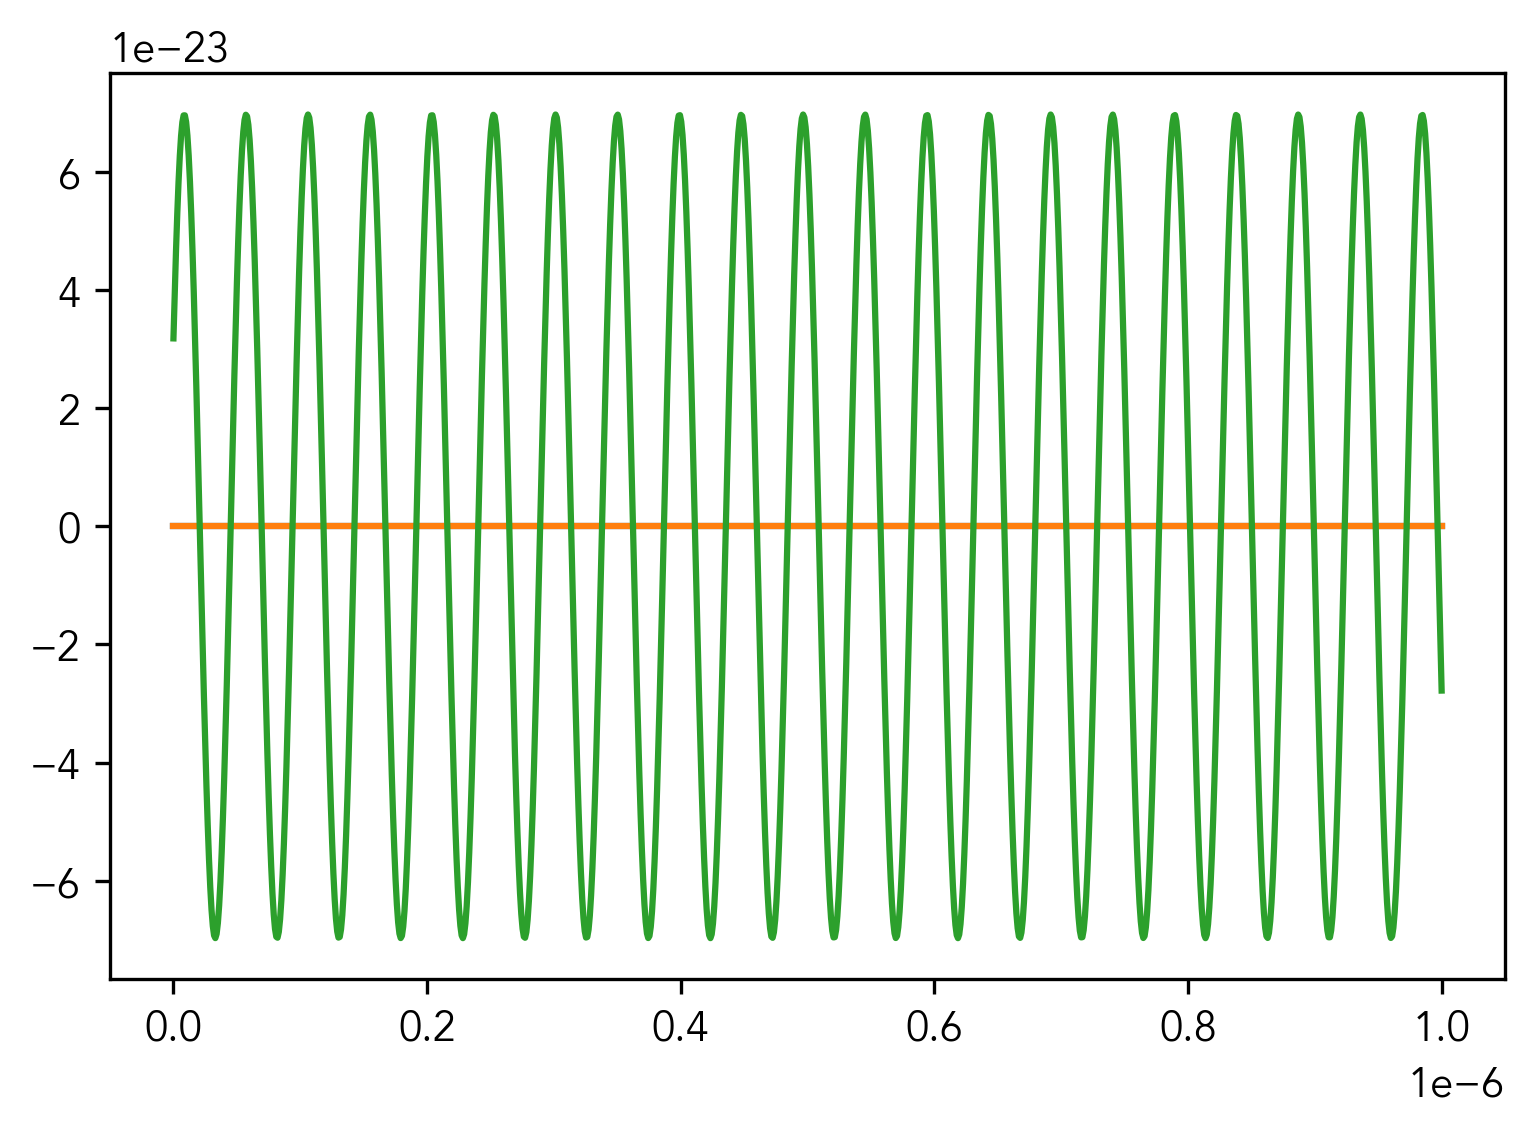

In [45]:

fig, ax = plt.subplots()
eField1d=electricFieldRotatingDipole(T_end,1,0,0,0.2,tIn)
ax.plot(tIn,eField1d[0])
ax.plot(tIn,eField1d[1])
ax.plot(tIn,eField1d[2])

In [46]:
rcyl=0.2  #Radius of a cylinder (might be in metres but need to go back and check some of the units)
zMax=0.2
z = np.linspace(-zMax, zMax, 51)  # Cylinder runs from -1 to 1
theta = np.linspace(0, 2*math.pi, 51) # Angle round the cylinder
Z,Theta = np.meshgrid(z,theta)   #Create a 2D grid of Z vs theta for making colour plots

newZ=np.repeat(Z[:, :, np.newaxis], len(tIn), axis=2)
newTheta=np.repeat(Theta[:, :, np.newaxis], len(tIn), axis=2)

#print(newZ)
eField=electricFieldRotatingDipole(T_end,1,newZ,newTheta,rcyl,tIn)

In [47]:
print(np.shape(eField[0]))

eFieldMag=np.sqrt(eField[0]**2 + eField[1]**2 +eField[2]**2)
#print(eFieldMag[:,:,0])

(51, 51, 1000)


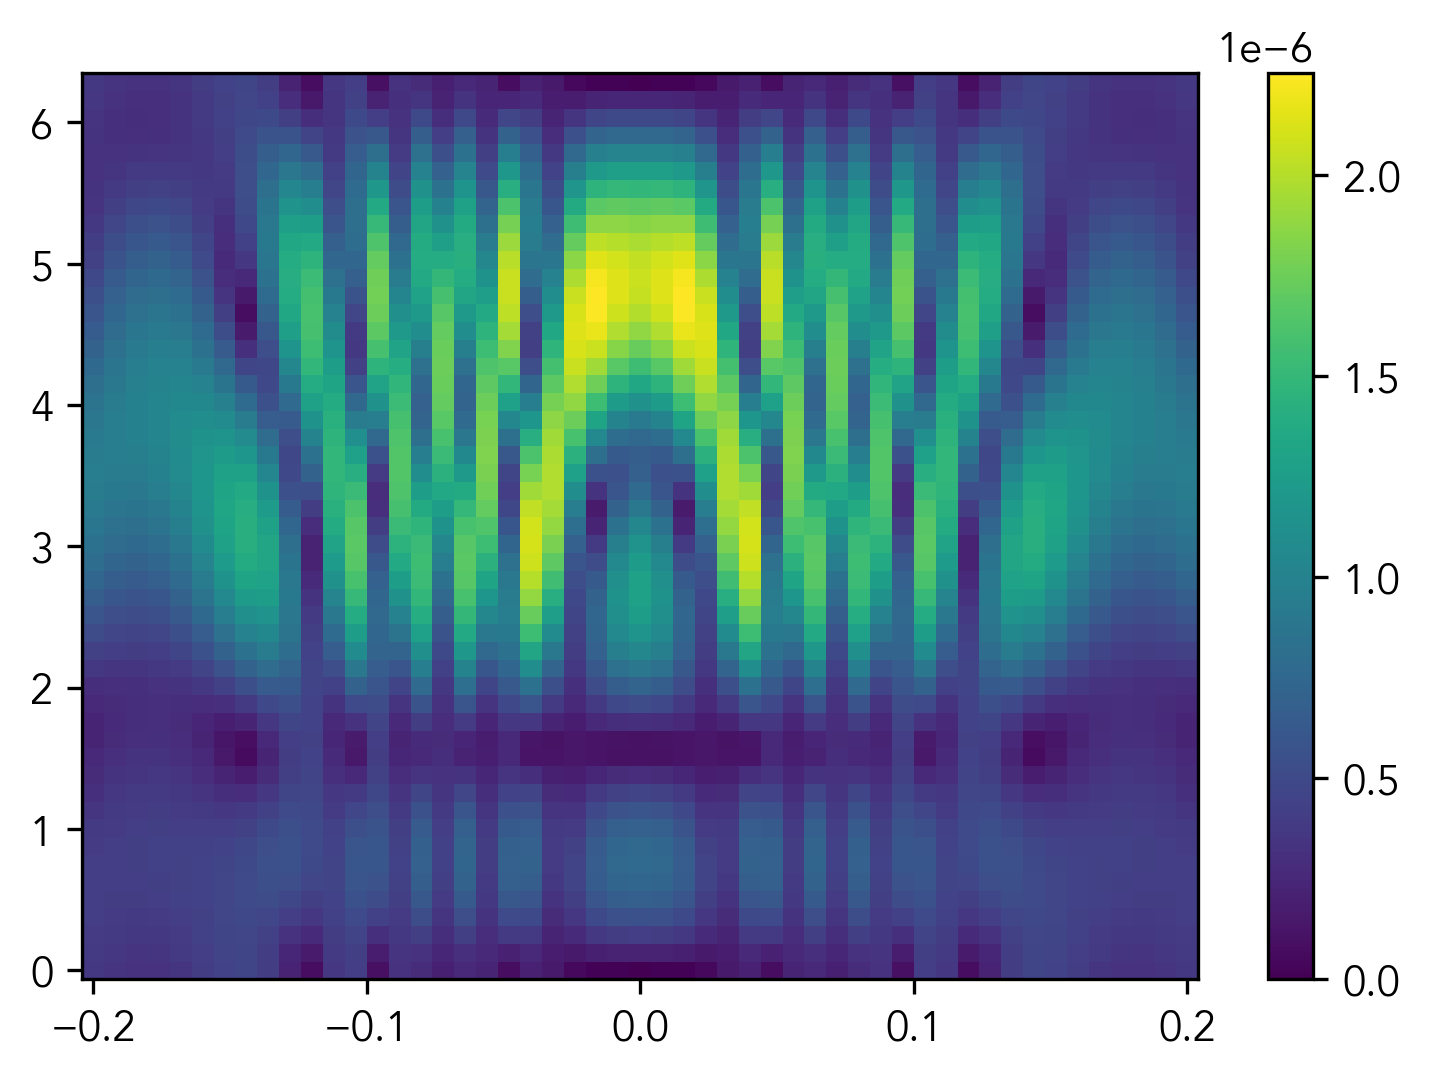

In [48]:
np.shape(eFieldMag)
fig, ax = plt.subplots()
#cmap=ax.pcolormesh(z, theta, newNewTheta[:,:,5])

cmap=ax.pcolormesh(Z, Theta,eFieldMag[:,:,0])
fig.colorbar(cmap)

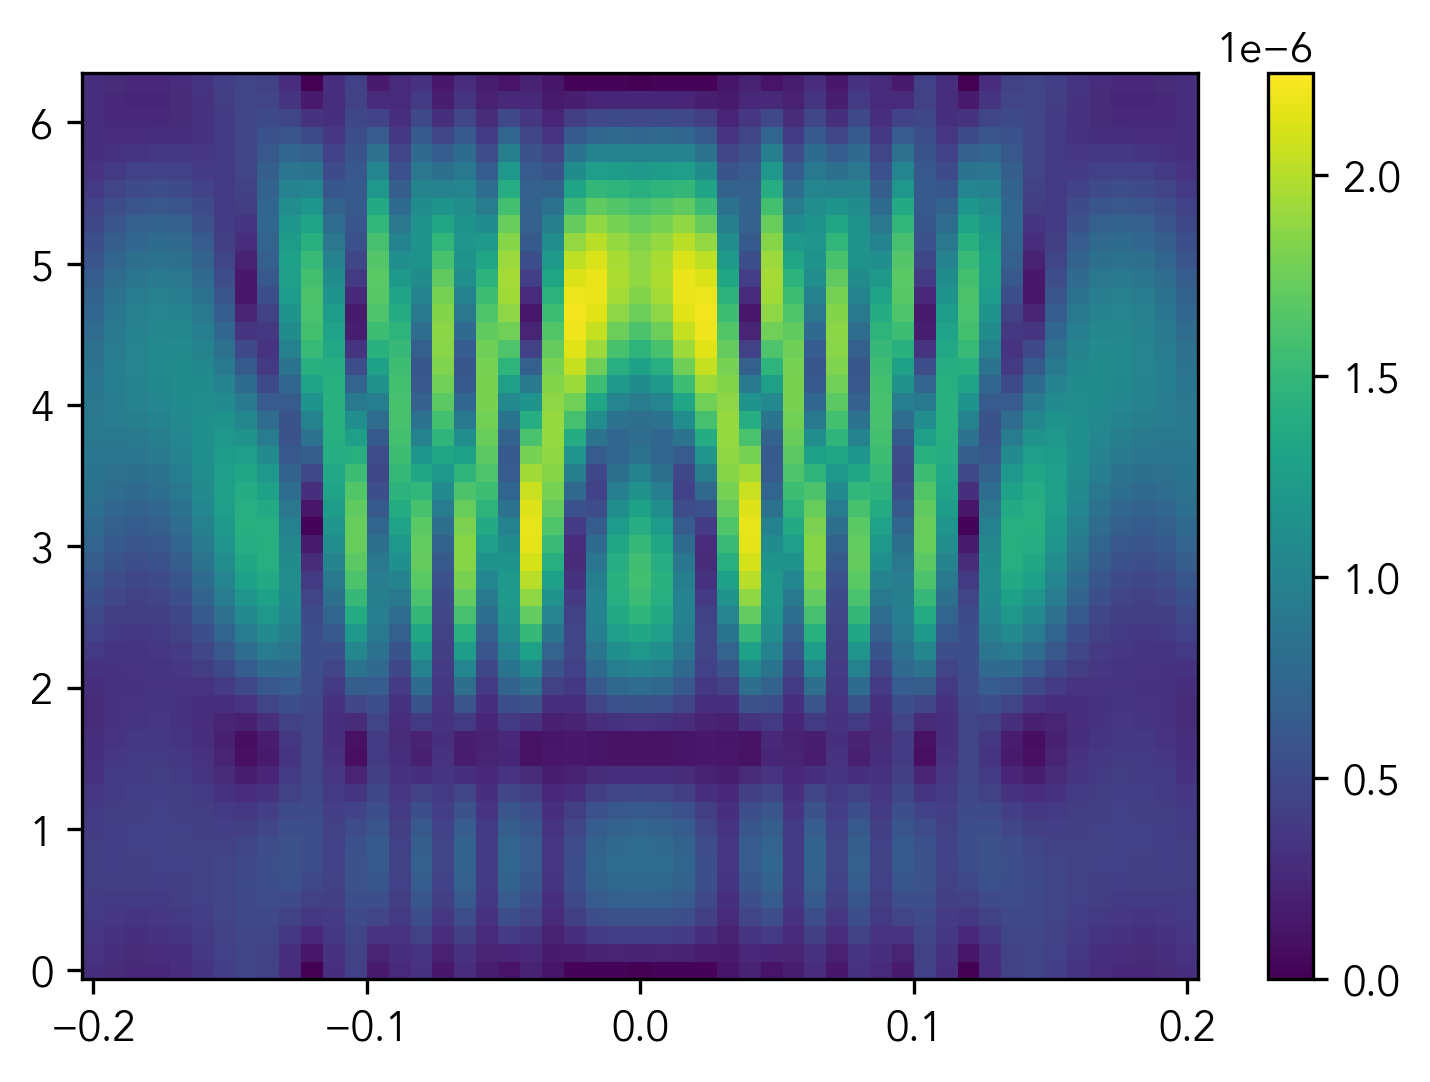

In [49]:

from matplotlib import pyplot as plt, animation
fig, ax = plt.subplots()
cmap=ax.pcolormesh(z, theta,eFieldMag[:,:,0])
fig.colorbar(cmap)

def animate(i):
    cmap.set_array(eFieldMag[:, :, i])

anim = animation.FuncAnimation(fig, animate, interval=100, frames=100)
anim.save('517.gif')
plt.show()


In [ ]:
def electricFieldRotatingDipole(T,B,inZ,phi,rcyl,t):
    # Returns electric field of a rotating dipole, this is an approximation for the cyclotron emission of an
    # electron in a uniform magentic field. This does things in a cylindrical coordinator system
    

    #Parameters:
    #    T: Kinetic energy of of an electron
    #    B: Magentic field in Tesla
    #    inZ: Z position of field (can be a numpy array)
    #    phi: Angle around the cylinder
    #    rcyl: Radius of the cylinder
    #    t: Time

    #Returns:
    #    reverse(str1):The string which gets reversed.   
    #print(z)
    tempX=rcyl*np.cos(phi)
    tempY=rcyl*np.sin(phi)
    #print(inZ)
    tempTheta=np.arctan2(rcyl,inZ)
    #print(inZ)
    tempR=np.sqrt(tempX**2 + tempY**2 +inZ**2) 
    me=scipy.constants.electron_mass
    v=np.sqrt(2*T/me)
    w=scipy.constants.e*B/me
    d=v/w
    sintheta=np.sin(tempTheta)
    costheta=np.cos(tempTheta)
    sinphi=np.sin(phi)
    cosphi=np.cos(phi)
    A=-(scipy.constants.mu_0*scipy.constants.e*d*w**2)/(4*math.pi*tempR)
    B=(tempX/tempR)*np.cos(w*(t-tempR/scipy.constants.c))
    Bx=B*(sintheta*cosphi -1)
    By=B*sintheta*sinphi
    Bz=B*costheta
    C=(tempY/tempR)*np.sin(w*(t-tempR/scipy.constants.c))
    Cx=C*sintheta*cosphi
    Cy=C*(sintheta*sinphi-1)
    Cz=C*costheta
    #print(np.shape(A),np.shape(Bx),np.shape(Cx))
    return np.array([A*(Bx+Cx),A*(By+Cy),A*(Bz+Cz)])
    